In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import pathlib
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import keras.backend as K
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
data_dir = './MP_image/GANs'

data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('MP_image/GANs')

In [3]:
MODA_image_dict_before={'before21': list(data_dir.glob('before21/*')),
                 
                 }
MODA_image_dict_after={'after21': list(data_dir.glob('after21/*')) 
                  }

In [4]:
MODA_label_dict_before={

    'before21':1
}

MODA_label_dict_after={
    'after21':0
}

In [5]:
MODA_label_dict_before.items()

dict_items([('before21', 1)])

In [6]:
img=cv2.imread(str(MODA_image_dict_before['before21'][0]))  # can convert image into three dimentianl pixel data
img.shape

(2046, 3072, 3)

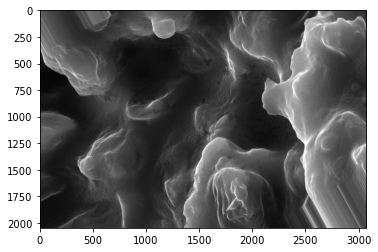

In [7]:
plt.imshow(img)

# Data augmentation by trainditional imagedatagenerator

from keras. preprocessing.image import ImageDataGenerator, load_img, img_to_array 

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
    vertical_flip=True,
fill_mode='nearest')

MP_types = os.listdir('./MP_image/GANs')
print(MP_types)
print('types of aged MP', len(MP_types))

aged_MP = []

for item in MP_types:
    all_mp = os.listdir('./MP_image/GANs' + '/' +item)
    for MP in all_mp:
        aged_MP.append((item, str('./MP_image/GANs' + '/' +item) + '/' + MP))
aged_MP
aged_MP_df = pd.DataFrame(data=aged_MP, columns=['days', 'images'])
print(aged_MP_df)

for image in aged_MP_df.loc[aged_MP_df['days'] == 'after21', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='./MP_image/GANs',
                              save_prefix='after21',
                           save_format='tif'):
        count +=1
        if count >10:
            break

for image in aged_MP_df.loc[aged_MP_df['days'] == 'before21', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='./MP_image/GANs',
                              save_prefix='before21',
                           save_format='tif'):
        count +=1
        if count >10:
            break

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt, zipfile
import os
import glob
import math
import random
import time
import datetime
import shutil
import imageio
from tqdm import tqdm, tqdm_notebook

from dataclasses import dataclass
from pathlib import Path
import warnings
from scipy import linalg

import xml.etree.ElementTree as ET 

import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape,\
Conv2DTranspose, Conv2D, Flatten, Dropout, Embedding, ReLU
from tensorflow.keras.optimizers import Adam

#from IPython import display

# libraries for SpectralNorm
from tensorflow.keras import backend as K
from keras.engine import *
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import constraints


In [9]:
X ,y =[], []

for aged_days, images in MODA_image_dict_before.items():
    for image in images:
        img = cv2.imread(str(image), cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(img, (224,224))
        X.append(resized_image)
        y.append(MODA_label_dict_before[aged_days])

In [10]:
X1 ,y1 =[], []

for aged_days, images in MODA_image_dict_after.items():
    for image in images:
        img = cv2.imread(str(image), cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(img, (224,224))
        X1.append(resized_image)
        y1.append(MODA_label_dict_after[aged_days])

In [11]:
def flip(x: tf.Tensor) -> (tf.Tensor):
    x = tf.image.random_flip_left_right(x)
    return x

In [12]:
X = np.array(X)
y = np.array(y)
X.shape

(367, 224, 224)

In [13]:
X1 = np.array(X1)
y1 = np.array(y1)
X1.shape

(622, 224, 224)

In [14]:
X = (X.astype(np.float32) - 127.5) / 127.5
X = np.expand_dims(X, axis=3)

In [15]:
X1 = (X1.astype(np.float32) - 127.5) / 127.5
X1 = np.expand_dims(X1, axis=3)

In [16]:
X.shape

(367, 224, 224, 1)

In [17]:
X1.shape

(622, 224, 224, 1)

In [18]:
X[3].shape

(224, 224, 1)

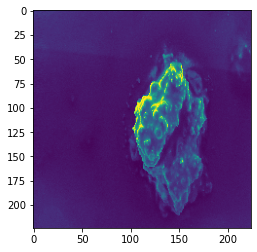

In [19]:
plt.imshow(X[3])

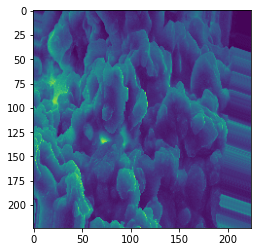

In [20]:
plt.imshow(X1[3])

In [21]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [22]:
print(tf.__version__)

2.4.1


# GANs

In [278]:
buffer_size = 2212
batch_size = 16
weight_init_std = 0.02
weight_init_mean = 0.0
leaky_relu_slope = 0.2
downsize_factor = 2
dropout_rate = 0.5
scale_factor = 4 ** downsize_factor
lr_decay_steps = 1000
noise_dim = 128

In [279]:
image_width = 224
image_height = 224
image_channels = 1
image_sample_size = 100

In [280]:
X1_1 = tf.data.Dataset.from_tensor_slices(X1).shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [281]:
print(X1_1)

<BatchDataset shapes: (16, 224, 224, 1), types: tf.float32>


In [282]:
X_1 = tf.data.Dataset.from_tensor_slices(X).shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [283]:
print(X_1)

<BatchDataset shapes: (16, 224, 224, 1), types: tf.float32>


In [284]:
print(X.shape)

(367, 224, 224, 1)


BUFFER_SIZE = 6000  
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

train_dataset1 = tf.data.Dataset.from_tensor_slices(X1).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [285]:
weight_initializer = tf.keras.initializers.TruncatedNormal(stddev=weight_init_std, mean=weight_init_mean,
                                                          seed=42)

In [286]:
class DenseSN(Dense):
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                                 initializer=initializers.RandomNormal(0, 1),
                                 name='sn',
                                 trainable=False)
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True
        
    def call(self, inputs, training=None):
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                 W_bar = K.reshape(W_bar, W_shape)  
        output = K.dot(inputs, W_bar)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output 
    
class ConvSN2D(Conv2D):

    def build(self, input_shape):
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')
        input_dim = input_shape[channel_axis]
        kernel_shape = self.kernel_size + (input_dim, self.filters)

        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
            
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                         initializer=initializers.RandomNormal(0, 1),
                         name='sn',
                         trainable=False)
        
        # Set input spec.
        self.input_spec = InputSpec(ndim=self.rank + 2,
                                    axes={channel_axis: input_dim})
        self.built = True
    def call(self, inputs, training=None):
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            #Accroding the paper, we only need to do power iteration one time.
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        #Spectral Normalization
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                W_bar = K.reshape(W_bar, W_shape)
                
        outputs = K.conv2d(
                inputs,
                W_bar,
                strides=self.strides,
                padding=self.padding,
                data_format=self.data_format,
                dilation_rate=self.dilation_rate)
        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)
        if self.activation is not None:
            return self.activation(outputs)
        return outputs

class ConvSN2DTranspose(Conv2DTranspose):

    def build(self, input_shape):
        if len(input_shape) != 4:
            raise ValueError('Inputs should have rank ' +
                             str(4) +
                             '; Received input shape:', str(input_shape))
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')
        input_dim = input_shape[channel_axis]
        kernel_shape = self.kernel_size + (self.filters, input_dim)

        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
            
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                         initializer=initializers.RandomNormal(0, 1),
                         name='sn',
                         trainable=False)
        
        # Set input spec.
        self.input_spec = InputSpec(ndim=4, axes={channel_axis: input_dim})
        self.built = True  
    
    def call(self, inputs):
        input_shape = K.shape(inputs)
        batch_size = input_shape[0]
        if self.data_format == 'channels_first':
            h_axis, w_axis = 2, 3
        else:
            h_axis, w_axis = 1, 2

        height, width = input_shape[h_axis], input_shape[w_axis]
        kernel_h, kernel_w = self.kernel_size
        stride_h, stride_w = self.strides
        if self.output_padding is None:
            out_pad_h = out_pad_w = None
        else:
            out_pad_h, out_pad_w = self.output_padding

        # Infer the dynamic output shape:
        out_height = conv_utils.deconv_length(height,
                                              stride_h, kernel_h,
                                              self.padding,
                                              out_pad_h)
        out_width = conv_utils.deconv_length(width,
                                             stride_w, kernel_w,
                                             self.padding,
                                             out_pad_w)
        if self.data_format == 'channels_first':
            output_shape = (batch_size, self.filters, out_height, out_width)
        else:
            output_shape = (batch_size, out_height, out_width, self.filters)
            
        #Spectral Normalization    
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            #Accroding the paper, we only need to do power iteration one time.
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                W_bar = K.reshape(W_bar, W_shape)
        self.kernel = W_bar
        
        outputs = K.conv2d_transpose(
            inputs,
            self.kernel,
            output_shape,
            self.strides,
            padding=self.padding,
            data_format=self.data_format)

        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)

        if self.activation is not None:
            return self.activation(outputs)
        return outputs

In [287]:
def transposed_conv(model, out_channels, ksize, stride_size, ptype='same'):
    model.add(Conv2DTranspose(out_channels, (ksize, ksize),
                              strides=(stride_size, stride_size), padding=ptype, 
                              kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    return model

def transposed_convSN(model, out_channels, ksize, stride_size, ptype='same'):
    model.add(ConvSN2DTranspose(out_channels, (ksize, ksize), 
                              strides=(stride_size, stride_size), padding=ptype, 
                              kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())
    return model

def convSN(model, out_channels, ksize, stride_size):
    model.add(ConvSN2D(out_channels, (ksize, ksize), strides=(stride_size, stride_size), padding='same',
                     kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_slope))
    #model.add(Dropout(dropout_rate))
    return model

def conv(model, out_channels, ksize, stride_size):
    model.add(Conv2D(out_channels, (ksize, ksize), strides=(stride_size, stride_size), padding='same',
                     kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_slope))
    #model.add(Dropout(dropout_rate))
    return model

In [288]:
def Generator():
    model = Sequential()
    model.add(Dense(image_width // scale_factor * image_height // scale_factor * 128,
                    input_shape=(noise_dim,), kernel_initializer=weight_initializer))
    #model.add(BatchNormalization(epsilon=BN_EPSILON, momentum=BN_MOMENTUM))
    #model.add(LeakyReLU(alpha=leaky_relu_slope))
    model.add(Reshape((image_height // scale_factor, image_width // scale_factor, 128)))
    
    model = transposed_conv(model, 512, ksize=5, stride_size=1)
    model.add(Dropout(dropout_rate))
    model = transposed_conv(model, 256, ksize=5, stride_size=2)
    model.add(Dropout(dropout_rate))
    model = transposed_conv(model, 128, ksize=5, stride_size=2)
    model = transposed_conv(model, 64, ksize=5, stride_size=2)
    model = transposed_conv(model, 32, ksize=5, stride_size=2)
    
    model.add(Dense(1, activation='tanh', kernel_initializer=weight_initializer))

    return model


In [289]:
generator = Generator()
print(generator.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 25088)             3236352   
_________________________________________________________________
reshape_6 (Reshape)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_30 (Conv2DT (None, 14, 14, 512)       1638400   
_________________________________________________________________
batch_normalization_48 (Batc (None, 14, 14, 512)       2048      
_________________________________________________________________
re_lu_30 (ReLU)              (None, 14, 14, 512)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_transpose_31 (Conv2DT (None, 28, 28, 256)     

(1, 224, 224, 1)
(1, 128) -0.100116804 1.1338395


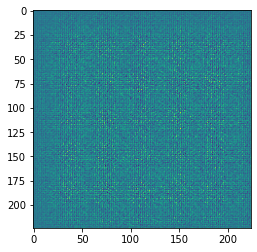

In [290]:
# random noise vector
noise = tf.random.normal([1,noise_dim])
#sample = generate_latent_points(100, 50)
# run the generator model with the noise vector as input
generated_image = generator(noise, training=False)
# display output
plt.imshow(generated_image[0, :, :, :])
print(generated_image.shape)
#print(sample.shape, sample.mean(), sample.std())
print(noise.shape, tf.math.reduce_mean(noise).numpy(), tf.math.reduce_std(noise).numpy())

In [291]:
def Discriminator(spectral_normalization=True):
    model = Sequential()
    if spectral_normalization:
        model.add(ConvSN2D(64, (5, 5), strides=(1,1), padding='same', use_bias=False,
                         input_shape=[image_height, image_width, image_channels], 
                         kernel_initializer=weight_initializer))
        #model.add(BatchNormalization(epsilon=BN_EPSILON, momentum=BN_MOMENTUM))
        model.add(LeakyReLU(alpha=leaky_relu_slope))
        #model.add(Dropout(dropout_rate))
        
        model = convSN(model, 64, ksize=5, stride_size=2)
        #model = convSN(model, 128, ksize=3, stride_size=1)
        model = convSN(model, 128, ksize=5, stride_size=2)
        #model = convSN(model, 256, ksize=3, stride_size=1)
        model = convSN(model, 256, ksize=5, stride_size=2)
        #model = convSN(model, 512, ksize=3, stride_size=1)
        #model.add(Dropout(dropout_rate))

        model.add(Flatten())
        model.add(DenseSN(1, activation='sigmoid'))
    else:
        model.add(Conv2D(64, (4, 4), strides=(2,2), padding='same', use_bias=False,
                         input_shape=[image_height, image_width, image_channels], 
                         kernel_initializer=weight_initializer))
        #model.add(BatchNormalization(epsilon=BN_EPSILON, momentum=BN_MOMENTUM))
        model.add(LeakyReLU(alpha=leaky_relu_slope))
        #model.add(Dropout(dropout_rate))

        model = conv(model, 64, ksize=4, stride_size=2)
        #model = convSN(model, 128, ksize=3, stride_size=1)
        model = conv(model, 128, ksize=4, stride_size=2)
        #model = convSN(model, 256, ksize=3, stride_size=1)
        model = conv(model, 256, ksize=4, stride_size=2)
        #model = convSN(model, 512, ksize=3, stride_size=1)

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
    return model

In [292]:
discriminator = Discriminator(spectral_normalization=True)
print(discriminator.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_s_n2d_24 (ConvSN2D)     (None, 224, 224, 64)      1664      
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv_s_n2d_25 (ConvSN2D)     (None, 112, 112, 64)      102464    
_________________________________________________________________
batch_normalization_53 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 112, 112, 64)      0         
_________________________________________________________________
conv_s_n2d_26 (ConvSN2D)     (None, 56, 56, 128)       204928    
_________________________________________________________________
batch_normalization_54 (Batc (None, 56, 56, 128)     

In [293]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.5000116]], shape=(1, 1), dtype=float32)


In [294]:
# Label smoothing -- technique from GAN hacks, instead of assigning 1/0 as class labels, 
# we assign a random integer in range [0.7, 1.0] for positive class
# and [0.0, 0.3] for negative class

def smooth_positive_labels(y):
    return y - 0.3 + (np.random.random(y.shape) * 0.5)

def smooth_negative_labels(y):
    return y + np.random.random(y.shape) * 0.3

In [295]:
# randomly flip some labels
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * int(y.shape[0]))
    # choose labels to flip
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)
    
    op_list = []
    # invert the labels in place
    #y_np[flip_ix] = 1 - y_np[flip_ix]
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1, y[i]))
        else:
            op_list.append(y[i])
    
    outputs = tf.stack(op_list)
    return outputs

In [296]:
generator_optimizer = tf.optimizers.Adam(beta_1=0.5)
discriminator_optimizer = tf.optimizers.Adam(beta_1=0.5)
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [297]:
def discriminator_loss(real_output, fake_output, loss_func, apply_label_smoothing=True, label_noise=True):
    if label_noise and apply_label_smoothing:
        real_output_noise = noisy_labels(tf.ones_like(real_output), 0.05)
        fake_output_noise = noisy_labels(tf.zeros_like(fake_output), 0.05)
        real_output_smooth = smooth_positive_labels(real_output_noise)
        fake_output_smooth = smooth_negative_labels(fake_output_noise)
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_smooth), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_smooth), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output_smooth - tf.reduce_mean(fake_output_smooth) - tf.ones_like(real_output_smooth)))
        + tf.reduce_mean(tf.square(fake_output_smooth - tf.reduce_mean(real_output_smooth) + tf.ones_like(fake_output_smooth)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_smooth)
                avg_real_logit = tf.reduce_mean(real_output_smooth)
                D_r_tilde = tf.nn.sigmoid(real_output_smooth - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_smooth - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output_smooth) - (real_output_smooth - tf.reduce_mean(fake_output_smooth))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_smooth) + (fake_output_smooth - tf.reduce_mean(real_output_smooth))))
        total_loss = real_loss + fake_loss
        return total_loss
    elif label_noise and not apply_label_smoothing:
        real_output_noise = noisy_labels(tf.ones_like(real_output), 0.05)
        fake_output_noise = noisy_labels(tf.zeros_like(fake_output), 0.05)
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_noise), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_noise), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output_noise - tf.reduce_mean(fake_output_noise) - tf.ones_like(real_output_noise)))
        + tf.reduce_mean(tf.square(fake_output_noise - tf.reduce_mean(real_output_noise) + tf.ones_like(fake_output_noise)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_noise)
                avg_real_logit = tf.reduce_mean(real_output_noise)
                D_r_tilde = tf.nn.sigmoid(real_output_noise - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_noise - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output_noise) - (real_output_noise - tf.reduce_mean(fake_output_noise))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_noise) + (fake_output_noise - tf.reduce_mean(real_output_noise))))
        total_loss = real_loss + fake_loss
        return total_loss
    elif apply_label_smoothing and not label_noise:
        real_output_smooth = smooth_positive_labels(tf.ones_like(real_output))
        fake_output_smooth = smooth_negative_labels(tf.zeros_like(fake_output))
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_smooth), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_smooth), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output_smooth - tf.reduce_mean(fake_output_smooth) - tf.ones_like(real_output_smooth)))
        + tf.reduce_mean(tf.square(fake_output_smooth - tf.reduce_mean(real_output_smooth) + tf.ones_like(fake_output_smooth)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_smooth)
                avg_real_logit = tf.reduce_mean(real_output_smooth)
                D_r_tilde = tf.nn.sigmoid(real_output_smooth - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_smooth - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output_smooth) - (real_output_smooth - tf.reduce_mean(fake_output_smooth))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_smooth) + (fake_output_smooth - tf.reduce_mean(real_output_smooth))))
        total_loss = real_loss + fake_loss
        return total_loss    
    else:
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output - tf.reduce_mean(fake_output) - tf.ones_like(real_output)))
        + tf.reduce_mean(tf.square(fake_output - tf.reduce_mean(real_output) + tf.ones_like(fake_output)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output)
                avg_real_logit = tf.reduce_mean(real_output)
                D_r_tilde = tf.nn.sigmoid(real_output - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output) - (real_output - tf.reduce_mean(fake_output))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output) + (fake_output - tf.reduce_mean(real_output))))
        total_loss = real_loss + fake_loss
        return total_loss

In [298]:
def generator_loss(real_output, fake_output, loss_func, apply_label_smoothing=True):
    if apply_label_smoothing:
        fake_output_smooth = smooth_negative_labels(tf.ones_like(fake_output))
        if loss_func == 'gan':
            return cross_entropy(tf.ones_like(fake_output_smooth), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output - tf.reduce_mean(fake_output_smooth) + tf.ones_like(real_output)))
        + tf.reduce_mean(tf.square(fake_output_smooth - tf.reduce_mean(real_output) - tf.ones_like(fake_output_smooth)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_smooth)
                avg_real_logit = tf.reduce_mean(real_output)
                D_r_tilde = tf.nn.sigmoid(real_output - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_smooth - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_f_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_r_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_smooth) - (fake_output_smooth - tf.reduce_mean(real_output))))
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output) + (real_output - tf.reduce_mean(fake_output_smooth))))
                loss = fake_loss + real_loss
                return loss
    else:           
        if loss_func == 'gan':
            return cross_entropy(tf.ones_like(fake_output), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output - tf.reduce_mean(fake_output) + tf.ones_like(real_output)))
        + tf.reduce_mean(tf.square(fake_output - tf.reduce_mean(real_output) - tf.ones_like(fake_output)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output)
                avg_real_logit = tf.reduce_mean(real_output)
                D_r_tilde = tf.nn.sigmoid(real_output - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_f_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_r_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output) - (fake_output - tf.reduce_mean(real_output))))
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output) + (real_output - tf.reduce_mean(fake_output))))
                loss = fake_loss + real_loss
                return loss 

In [299]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [300]:
EPOCHS = 280
num_examples_to_generate = 1
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [301]:
def train_step(images, loss_type='gan'):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(real_output, fake_output, loss_type, apply_label_smoothing=True)
        disc_loss = discriminator_loss(real_output, fake_output, loss_type, 
                                       apply_label_smoothing=True, label_noise=True)
 
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

In [302]:
def plot_losses(G_losses, D_losses, all_gl, all_dl, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH {}".format(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    ymax = plt.ylim()[1]
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(all_gl)),all_gl,label='G')
    plt.plot(np.arange(len(all_dl)),all_dl,label='D')
    plt.legend()
    #plt.ylim((0,np.min([1.1*np.max(all_gl),2*ymax])))
    plt.title('All Time Loss')
    plt.show()

In [303]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    
    for i in range(predictions.shape[0]):
        plt.figure(figsize=(6, 6))
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [304]:
def generate_test_image(model, noise_dim=noise_dim):
    test_input = tf.random.normal([1, noise_dim])
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(5,5))
    plt.imshow((predictions[0, :, :, :] * 127.5 + 127.5) / 255.)
    plt.axis('off') 
    plt.show()

In [305]:
lr_initial_d = 0.0001
lr_initial_g = 0.0001

In [306]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [307]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)


def decayed_learning_rate(step):
  step = min(step, lr_decay_steps)
  cosine_decay = 0.5 * (1 + cos(pi * step / lr_decay_steps))
  decayed = (1 - alpha) * cosine_decay + alpha
  return initial_learning_rate * decayed

In [308]:
OUT_DIR = Path('../MP_image/')

In [309]:
def save_images(directory=OUT_DIR):
    for k in range(image_sample_size):
        generated_image = generator(tf.random.normal([1, noise_dim]), training=False)
        f = str(k)+'.png'
        f = os.path.join(directory, f)
        img = np.array(generated_image)
        img = (img[0, :, :, :] + 1.) / 2.
        img = np.squeeze(img, axis=2)  # axis=2 is channel dimension 
        img = Image.fromarray((255*img).astype(np.uint8))
        img.save(f,'PNG')
        #if k % 1000==0: print(k)
    print('Saved temporary images for evaluation.')
def zip_images(filename='images.zip'):
    # SAVE TO ZIP FILE NAMED IMAGES.ZIP
    z = zipfile.PyZipFile(filename, mode='w')
    for k in range(image_sample_size):
        generated_image = generator(tf.random.normal([1, noise_dim]), training=False)
        f = str(k)+'.png'
        img = np.array(generated_image)
        img = (img[0, :, :, :] + 1.) / 2.
        img = np.squeeze(img, axis=2)
        img = Image.fromarray((255*img).astype(np.uint8))
        img.save(f,'PNG')
        z.write(f)
        os.remove(f)
        #if k % 1000==0: print(k)
    z.close()
    print('Saved final images for submission.')

display_results = 40

decay_step = 50

def train(dataset, epochs):
    all_gl = np.array([]); all_dl = np.array([])
    
    exp_replay = []
    for epoch in tqdm(range(epochs)):
        
        G_loss = []; D_loss = []
        
        start = time.time()
        new_lr_d = lr_initial_d
        new_lr_g = lr_initial_g
        global_step = 0
        
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            global_step = global_step + 1
            G_loss.append(g_loss); D_loss.append(d_loss)
            all_gl = np.append(all_gl,np.array([G_loss]))
            all_dl = np.append(all_dl,np.array([D_loss]))

         
        #display.clear_output(wait=True)
        if (epoch + 1) % display_results == 0 or epoch == 0:
            plot_losses(G_loss, D_loss, all_gl, all_dl, epoch + 1)
            generate_and_save_images(generator, epoch + 1, seed, rows=4, cols=4)
        
                
        # expotential learning rate decay
        if (epoch + 1) % decay_step == 0:
            new_lr_d = lr_schedule
            new_lr_g = lr_schedule
            generator_optimizer = tf.optimizers.Adam(learning_rate=new_lr_d, beta_1=0.5)
            discriminator_optimizer = tf.optimizers.Adam(learning_rate=new_lr_g, beta_1=0.5)          

        print('Epoch: {} computed for {} sec'.format(epoch + 1, time.time() - start))
        print('Gen_loss mean: ', np.mean(G_loss),' std: ', np.std(G_loss))
        print('Disc_loss mean: ', np.mean(D_loss),' std: ', np.std(D_loss))

    # Generate after the final epoch
    #display.clear_output(wait=True)
    #final_seed = tf.random.normal([64, noise_dim])
    generate_and_save_images(generator, epochs, seed)
    checkpoint.save(file_prefix = checkpoint_prefix)
    OUT_DIR.mkdir(exist_ok=True)
    save_images(OUT_DIR)
      
    print('Final epoch.')

In [310]:
display_results = 40

decay_step = 50

def train(dataset, epochs):
    all_gl = np.array([]); all_dl = np.array([])
    
    exp_replay = []
    for epoch in tqdm(range(epochs)):
        
        G_loss = []; D_loss = []
        
        start = time.time()
        new_lr_d = lr_initial_d
        new_lr_g = lr_initial_g
        global_step = 0
        
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            global_step = global_step + 1
            G_loss.append(g_loss); D_loss.append(d_loss)
            all_gl = np.append(all_gl,np.array([G_loss]))
            all_dl = np.append(all_dl,np.array([D_loss]))

         
        #display.clear_output(wait=True)
        if (epoch + 1) % display_results == 0 or epoch == 0:
            plot_losses(G_loss, D_loss, all_gl, all_dl, epoch + 1)
            generate_and_save_images(generator, epoch + 1, seed)
        
                
        # expotentialdecay learning rate decay
        if (epoch + 1) % decay_step == 0:
            new_lr_d = lr_schedule
            new_lr_g = lr_schedule
            generator_optimizer = tf.optimizers.Adam(learning_rate=new_lr_d, beta_1=0.5)
            discriminator_optimizer = tf.optimizers.Adam(learning_rate=new_lr_g, beta_1=0.5)          

        print('Epoch: {} computed for {} sec'.format(epoch + 1, time.time() - start))
        print('Gen_loss mean: ', np.mean(G_loss),' std: ', np.std(G_loss))
        print('Disc_loss mean: ', np.mean(D_loss),' std: ', np.std(D_loss))

    # Generate after the final epoch
    #display.clear_output(wait=True)
    #final_seed = tf.random.normal([64, noise_dim])
    generate_and_save_images(generator, epochs, seed)
    checkpoint.save(file_prefix = checkpoint_prefix)
    OUT_DIR.mkdir(exist_ok=True)
    save_images(OUT_DIR)
      
    print('Final epoch.')

  0%|                                                                                          | 0/280 [00:00<?, ?it/s]

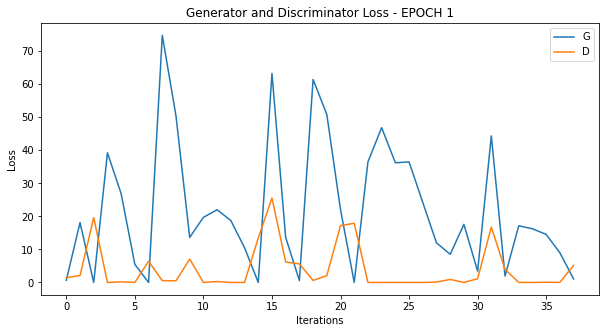

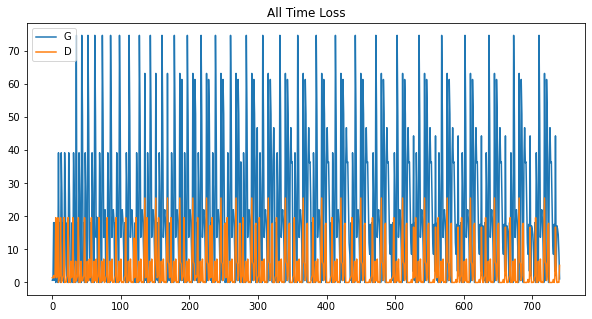

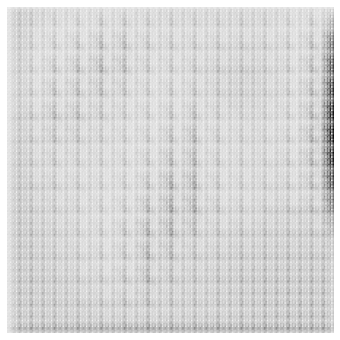

  0%|▎                                                                               | 1/280 [00:17<1:19:49, 17.17s/it]

Epoch: 1 computed for 17.16332173347473 sec
Gen_loss mean:  22.048763  std:  19.82759
Disc_loss mean:  4.0736337  std:  6.691769


  1%|▌                                                                               | 2/280 [00:33<1:16:00, 16.40s/it]

Epoch: 2 computed for 15.869078397750854 sec
Gen_loss mean:  8.982904  std:  8.416651
Disc_loss mean:  5.0643773  std:  6.6078677


  1%|▊                                                                               | 3/280 [00:48<1:14:44, 16.19s/it]

Epoch: 3 computed for 15.932804346084595 sec
Gen_loss mean:  7.640536  std:  5.30169
Disc_loss mean:  1.562014  std:  2.902522


  1%|█▏                                                                              | 4/280 [01:05<1:14:23, 16.17s/it]

Epoch: 4 computed for 16.139742612838745 sec
Gen_loss mean:  8.228235  std:  8.268181
Disc_loss mean:  2.981676  std:  3.5540357


  2%|█▍                                                                              | 5/280 [01:21<1:14:22, 16.23s/it]

Epoch: 5 computed for 16.330623626708984 sec
Gen_loss mean:  5.4470334  std:  4.951783
Disc_loss mean:  1.8781812  std:  2.1766288


  2%|█▋                                                                              | 6/280 [01:38<1:14:51, 16.39s/it]

Epoch: 6 computed for 16.704546689987183 sec
Gen_loss mean:  4.767465  std:  3.5164335
Disc_loss mean:  1.7650461  std:  2.1807296


  2%|██                                                                              | 7/280 [01:54<1:15:07, 16.51s/it]

Epoch: 7 computed for 16.757238626480103 sec
Gen_loss mean:  3.838157  std:  2.7431486
Disc_loss mean:  1.9321389  std:  1.5401621


  3%|██▎                                                                             | 8/280 [02:11<1:14:40, 16.47s/it]

Epoch: 8 computed for 16.38439130783081 sec
Gen_loss mean:  3.25447  std:  2.5831952
Disc_loss mean:  1.7698617  std:  1.3522003


  3%|██▌                                                                             | 9/280 [02:27<1:14:16, 16.44s/it]

Epoch: 9 computed for 16.3766188621521 sec
Gen_loss mean:  3.9107454  std:  3.3130126
Disc_loss mean:  1.5040834  std:  1.228232


  4%|██▊                                                                            | 10/280 [02:43<1:13:46, 16.39s/it]

Epoch: 10 computed for 16.277368783950806 sec
Gen_loss mean:  3.9393241  std:  3.1847386
Disc_loss mean:  1.8804159  std:  2.10433


  4%|███                                                                            | 11/280 [03:00<1:13:24, 16.37s/it]

Epoch: 11 computed for 16.32442355155945 sec
Gen_loss mean:  4.1600485  std:  3.4251046
Disc_loss mean:  1.1872748  std:  2.3314588


  4%|███▍                                                                           | 12/280 [03:16<1:13:14, 16.40s/it]

Epoch: 12 computed for 16.456220626831055 sec
Gen_loss mean:  3.1139648  std:  2.1353583
Disc_loss mean:  0.97501683  std:  0.94497913


  5%|███▋                                                                           | 13/280 [03:33<1:12:52, 16.38s/it]

Epoch: 13 computed for 16.31844139099121 sec
Gen_loss mean:  3.187962  std:  2.266864
Disc_loss mean:  1.1809722  std:  1.3495928


  5%|███▉                                                                           | 14/280 [03:49<1:12:42, 16.40s/it]

Epoch: 14 computed for 16.451972484588623 sec
Gen_loss mean:  3.523316  std:  2.3266025
Disc_loss mean:  0.92533857  std:  0.99225277


  5%|████▏                                                                          | 15/280 [04:05<1:12:32, 16.42s/it]

Epoch: 15 computed for 16.476501941680908 sec
Gen_loss mean:  3.444587  std:  1.8906237
Disc_loss mean:  0.6611332  std:  0.50446445


  6%|████▌                                                                          | 16/280 [04:22<1:12:19, 16.44s/it]

Epoch: 16 computed for 16.463104248046875 sec
Gen_loss mean:  3.5073223  std:  2.535891
Disc_loss mean:  0.8511194  std:  0.7606514


  6%|████▊                                                                          | 17/280 [04:38<1:12:07, 16.45s/it]

Epoch: 17 computed for 16.493980407714844 sec
Gen_loss mean:  3.5026731  std:  2.0422003
Disc_loss mean:  0.6033477  std:  0.7344881


  6%|█████                                                                          | 18/280 [04:55<1:11:49, 16.45s/it]

Epoch: 18 computed for 16.428268909454346 sec
Gen_loss mean:  3.5104406  std:  2.546942
Disc_loss mean:  0.7405983  std:  0.82126147


  7%|█████▎                                                                         | 19/280 [05:11<1:11:42, 16.49s/it]

Epoch: 19 computed for 16.57650351524353 sec
Gen_loss mean:  3.5560932  std:  2.6541066
Disc_loss mean:  0.8793373  std:  0.7696647


  7%|█████▋                                                                         | 20/280 [05:28<1:11:22, 16.47s/it]

Epoch: 20 computed for 16.435180187225342 sec
Gen_loss mean:  3.3304956  std:  1.5924939
Disc_loss mean:  0.7881274  std:  1.0474987


  8%|█████▉                                                                         | 21/280 [05:44<1:11:01, 16.46s/it]

Epoch: 21 computed for 16.41552209854126 sec
Gen_loss mean:  3.7450073  std:  2.46835
Disc_loss mean:  0.64878607  std:  0.5084615


  8%|██████▏                                                                        | 22/280 [06:01<1:10:40, 16.44s/it]

Epoch: 22 computed for 16.391437530517578 sec
Gen_loss mean:  3.0443246  std:  2.259616
Disc_loss mean:  1.0868534  std:  1.2035006


  8%|██████▍                                                                        | 23/280 [06:17<1:10:17, 16.41s/it]

Epoch: 23 computed for 16.347890853881836 sec
Gen_loss mean:  2.7209086  std:  1.8833199
Disc_loss mean:  1.0687644  std:  0.8706757


  9%|██████▊                                                                        | 24/280 [06:33<1:10:02, 16.41s/it]

Epoch: 24 computed for 16.420101165771484 sec
Gen_loss mean:  2.4623315  std:  1.6876619
Disc_loss mean:  1.2831668  std:  0.97469103


  9%|███████                                                                        | 25/280 [06:50<1:09:33, 16.37s/it]

Epoch: 25 computed for 16.256200075149536 sec
Gen_loss mean:  2.50457  std:  1.8113348
Disc_loss mean:  1.2465346  std:  0.80924773


  9%|███████▎                                                                       | 26/280 [07:06<1:09:21, 16.39s/it]

Epoch: 26 computed for 16.425954580307007 sec
Gen_loss mean:  2.1415858  std:  1.2038839
Disc_loss mean:  0.95082873  std:  0.55560285


 10%|███████▌                                                                       | 27/280 [07:22<1:08:57, 16.35s/it]

Epoch: 27 computed for 16.27346396446228 sec
Gen_loss mean:  2.6673265  std:  1.5711266
Disc_loss mean:  0.99137646  std:  0.7659854


 10%|███████▉                                                                       | 28/280 [07:39<1:08:39, 16.35s/it]

Epoch: 28 computed for 16.33736824989319 sec
Gen_loss mean:  2.340996  std:  1.5095526
Disc_loss mean:  0.9604165  std:  0.60707146


 10%|████████▏                                                                      | 29/280 [07:55<1:08:20, 16.34s/it]

Epoch: 29 computed for 16.303906679153442 sec
Gen_loss mean:  2.6219091  std:  1.9686946
Disc_loss mean:  1.3717947  std:  1.1671965


 11%|████████▍                                                                      | 30/280 [08:12<1:08:50, 16.52s/it]

Epoch: 30 computed for 16.958463430404663 sec
Gen_loss mean:  2.1266892  std:  1.0689785
Disc_loss mean:  0.8749544  std:  0.45271042


 11%|████████▋                                                                      | 31/280 [08:29<1:09:21, 16.71s/it]

Epoch: 31 computed for 17.15546202659607 sec
Gen_loss mean:  2.2367988  std:  1.2427499
Disc_loss mean:  0.8486291  std:  0.6851291


 11%|█████████                                                                      | 32/280 [08:47<1:09:47, 16.89s/it]

Epoch: 32 computed for 17.282533645629883 sec
Gen_loss mean:  2.3308113  std:  1.5848557
Disc_loss mean:  1.2794102  std:  0.8253373


 12%|█████████▎                                                                     | 33/280 [09:05<1:11:00, 17.25s/it]

Epoch: 33 computed for 18.0939199924469 sec
Gen_loss mean:  2.7544053  std:  2.2810445
Disc_loss mean:  1.057386  std:  1.2719878


 12%|█████████▌                                                                     | 34/280 [09:21<1:10:00, 17.07s/it]

Epoch: 34 computed for 16.665639638900757 sec
Gen_loss mean:  2.1240788  std:  1.3419415
Disc_loss mean:  1.0177666  std:  0.71063715


 12%|█████████▉                                                                     | 35/280 [09:38<1:09:30, 17.02s/it]

Epoch: 35 computed for 16.90113639831543 sec
Gen_loss mean:  2.1032155  std:  1.3097565
Disc_loss mean:  0.91908044  std:  0.4790095


 13%|██████████▏                                                                    | 36/280 [09:55<1:08:59, 16.97s/it]

Epoch: 36 computed for 16.832206964492798 sec
Gen_loss mean:  1.9998751  std:  1.0276812
Disc_loss mean:  0.86967355  std:  0.3750268


 13%|██████████▍                                                                    | 37/280 [10:12<1:08:15, 16.85s/it]

Epoch: 37 computed for 16.588732957839966 sec
Gen_loss mean:  2.4329512  std:  1.6203701
Disc_loss mean:  0.9671151  std:  0.65855116


 14%|██████████▋                                                                    | 38/280 [10:28<1:07:21, 16.70s/it]

Epoch: 38 computed for 16.342097520828247 sec
Gen_loss mean:  2.192087  std:  1.2261574
Disc_loss mean:  0.70535475  std:  0.2761403


 14%|███████████                                                                    | 39/280 [10:44<1:06:38, 16.59s/it]

Epoch: 39 computed for 16.337927103042603 sec
Gen_loss mean:  2.6597242  std:  1.7003081
Disc_loss mean:  0.7949069  std:  0.596379


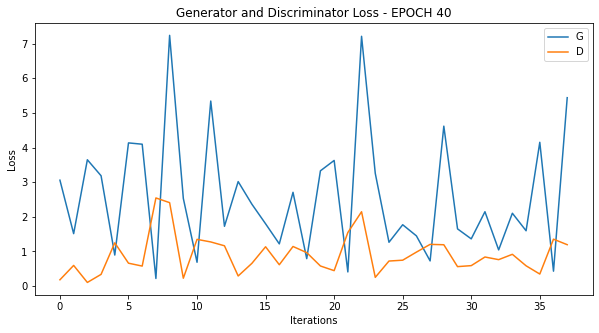

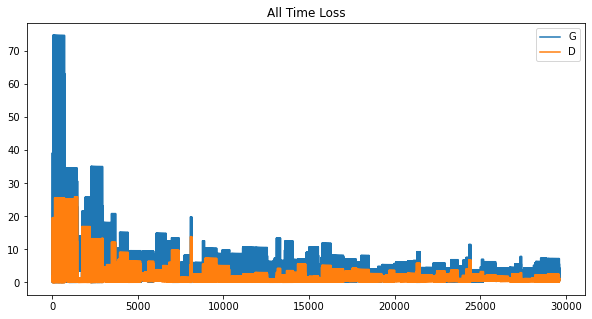

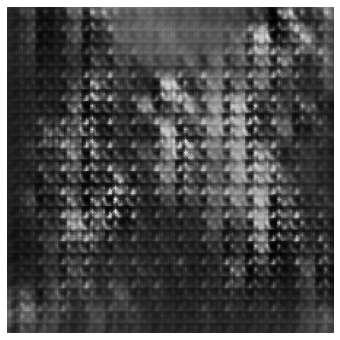

 14%|███████████▎                                                                   | 40/280 [11:01<1:06:40, 16.67s/it]

Epoch: 40 computed for 16.8449125289917 sec
Gen_loss mean:  2.5721188  std:  1.7509133
Disc_loss mean:  0.90574396  std:  0.56635565


 15%|███████████▌                                                                   | 41/280 [11:18<1:06:09, 16.61s/it]

Epoch: 41 computed for 16.460396766662598 sec
Gen_loss mean:  2.3387713  std:  1.239108
Disc_loss mean:  0.75331527  std:  0.6104423


 15%|███████████▊                                                                   | 42/280 [11:34<1:05:36, 16.54s/it]

Epoch: 42 computed for 16.38608694076538 sec
Gen_loss mean:  2.6409924  std:  1.615883
Disc_loss mean:  0.808271  std:  0.58201516


 15%|████████████▏                                                                  | 43/280 [11:50<1:05:10, 16.50s/it]

Epoch: 43 computed for 16.40578031539917 sec
Gen_loss mean:  2.383749  std:  1.3244966
Disc_loss mean:  0.7866404  std:  0.6612613


 16%|████████████▍                                                                  | 44/280 [12:07<1:05:00, 16.53s/it]

Epoch: 44 computed for 16.587345361709595 sec
Gen_loss mean:  2.5771809  std:  1.527863
Disc_loss mean:  0.850783  std:  0.7428943


 16%|████████████▋                                                                  | 45/280 [12:23<1:04:33, 16.48s/it]

Epoch: 45 computed for 16.370944261550903 sec
Gen_loss mean:  3.1060705  std:  2.1673164
Disc_loss mean:  0.7064367  std:  0.6395446


 16%|████████████▉                                                                  | 46/280 [12:40<1:04:14, 16.47s/it]

Epoch: 46 computed for 16.45301866531372 sec
Gen_loss mean:  2.6298957  std:  1.4887822
Disc_loss mean:  0.63456595  std:  0.4203517


 17%|█████████████▎                                                                 | 47/280 [12:56<1:03:52, 16.45s/it]

Epoch: 47 computed for 16.393287420272827 sec
Gen_loss mean:  2.8704293  std:  1.9087492
Disc_loss mean:  0.85486853  std:  0.5192776


 17%|█████████████▌                                                                 | 48/280 [13:13<1:03:43, 16.48s/it]

Epoch: 48 computed for 16.549771070480347 sec
Gen_loss mean:  2.2749474  std:  1.4484054
Disc_loss mean:  0.9249628  std:  0.5654973


 18%|█████████████▊                                                                 | 49/280 [13:29<1:03:13, 16.42s/it]

Epoch: 49 computed for 16.283812284469604 sec
Gen_loss mean:  2.2420738  std:  1.3849854
Disc_loss mean:  0.76861745  std:  0.55917025


 18%|██████████████                                                                 | 50/280 [13:45<1:02:57, 16.42s/it]

Epoch: 50 computed for 16.419612646102905 sec
Gen_loss mean:  2.3663642  std:  1.3900716
Disc_loss mean:  0.73537815  std:  0.38610837


 18%|██████████████▍                                                                | 51/280 [14:02<1:02:38, 16.41s/it]

Epoch: 51 computed for 16.385947942733765 sec
Gen_loss mean:  2.3670928  std:  1.5948722
Disc_loss mean:  0.8128181  std:  0.43337783


 19%|██████████████▋                                                                | 52/280 [14:19<1:03:22, 16.68s/it]

Epoch: 52 computed for 17.29720950126648 sec
Gen_loss mean:  2.6023898  std:  1.4111558
Disc_loss mean:  0.7369123  std:  0.6079023


 19%|██████████████▉                                                                | 53/280 [14:36<1:03:20, 16.74s/it]

Epoch: 53 computed for 16.890272855758667 sec
Gen_loss mean:  2.5426474  std:  1.7038047
Disc_loss mean:  0.7315067  std:  0.6280684


 19%|███████████████▏                                                               | 54/280 [14:53<1:03:50, 16.95s/it]

Epoch: 54 computed for 17.432417154312134 sec
Gen_loss mean:  2.290116  std:  1.3894347
Disc_loss mean:  0.89039344  std:  0.5761121


 20%|███████████████▌                                                               | 55/280 [15:10<1:03:18, 16.88s/it]

Epoch: 55 computed for 16.723596811294556 sec
Gen_loss mean:  2.3584027  std:  1.3778527
Disc_loss mean:  0.7016374  std:  0.3976779


 20%|███████████████▊                                                               | 56/280 [15:27<1:03:11, 16.93s/it]

Epoch: 56 computed for 17.02556085586548 sec
Gen_loss mean:  2.2752979  std:  1.3265514
Disc_loss mean:  0.79870015  std:  0.7299301


 20%|████████████████                                                               | 57/280 [15:44<1:02:24, 16.79s/it]

Epoch: 57 computed for 16.4729425907135 sec
Gen_loss mean:  2.7039971  std:  1.8685733
Disc_loss mean:  0.6982361  std:  0.53892857


 21%|████████████████▎                                                              | 58/280 [16:00<1:01:37, 16.65s/it]

Epoch: 58 computed for 16.33071494102478 sec
Gen_loss mean:  2.7673733  std:  1.7885679
Disc_loss mean:  0.7944582  std:  0.7119251


 21%|████████████████▋                                                              | 59/280 [16:16<1:01:02, 16.57s/it]

Epoch: 59 computed for 16.382410049438477 sec
Gen_loss mean:  2.370225  std:  1.2679178
Disc_loss mean:  0.5839744  std:  0.29818675


 21%|████████████████▉                                                              | 60/280 [16:33<1:00:40, 16.55s/it]

Epoch: 60 computed for 16.48517632484436 sec
Gen_loss mean:  2.451343  std:  1.4259201
Disc_loss mean:  0.7899833  std:  0.7091504


 22%|█████████████████▏                                                             | 61/280 [16:49<1:00:19, 16.53s/it]

Epoch: 61 computed for 16.485258102416992 sec
Gen_loss mean:  2.813842  std:  1.8715855
Disc_loss mean:  0.6380114  std:  0.535657


 22%|█████████████████▍                                                             | 62/280 [17:06<1:00:06, 16.55s/it]

Epoch: 62 computed for 16.580355405807495 sec
Gen_loss mean:  2.4472725  std:  1.495487
Disc_loss mean:  0.72478807  std:  0.50301677


 22%|██████████████████▏                                                              | 63/280 [17:22<59:47, 16.53s/it]

Epoch: 63 computed for 16.498676300048828 sec
Gen_loss mean:  2.3575497  std:  1.3933573
Disc_loss mean:  0.71963125  std:  0.494378


 23%|██████████████████▌                                                              | 64/280 [17:39<59:24, 16.50s/it]

Epoch: 64 computed for 16.42735266685486 sec
Gen_loss mean:  2.6722958  std:  1.7374481
Disc_loss mean:  0.61921155  std:  0.4721706


 23%|██████████████████▊                                                              | 65/280 [17:55<59:03, 16.48s/it]

Epoch: 65 computed for 16.42938733100891 sec
Gen_loss mean:  2.4707952  std:  1.3820227
Disc_loss mean:  0.68771636  std:  0.37309724


 24%|███████████████████                                                              | 66/280 [18:12<58:50, 16.50s/it]

Epoch: 66 computed for 16.5388605594635 sec
Gen_loss mean:  2.8897197  std:  1.6792333
Disc_loss mean:  0.57479995  std:  0.38816968


 24%|███████████████████▍                                                             | 67/280 [18:28<58:15, 16.41s/it]

Epoch: 67 computed for 16.19965362548828 sec
Gen_loss mean:  2.701204  std:  1.3528441
Disc_loss mean:  0.49916083  std:  0.32627454


 24%|███████████████████▋                                                             | 68/280 [18:44<57:32, 16.28s/it]

Epoch: 68 computed for 15.991225242614746 sec
Gen_loss mean:  2.6817408  std:  1.6965704
Disc_loss mean:  0.6183993  std:  0.49872983


 25%|███████████████████▉                                                             | 69/280 [19:00<57:11, 16.26s/it]

Epoch: 69 computed for 16.209197759628296 sec
Gen_loss mean:  2.7137988  std:  1.4935911
Disc_loss mean:  0.50862527  std:  0.268345


 25%|████████████████████▎                                                            | 70/280 [19:17<57:19, 16.38s/it]

Epoch: 70 computed for 16.650501012802124 sec
Gen_loss mean:  2.8625488  std:  1.767233
Disc_loss mean:  0.66508794  std:  0.4268114


 25%|████████████████████▌                                                            | 71/280 [19:33<57:08, 16.40s/it]

Epoch: 71 computed for 16.456642866134644 sec
Gen_loss mean:  2.686933  std:  1.5389237
Disc_loss mean:  0.5494091  std:  0.32576847


 26%|████████████████████▊                                                            | 72/280 [19:50<56:54, 16.42s/it]

Epoch: 72 computed for 16.443584442138672 sec
Gen_loss mean:  2.8444061  std:  1.3197631
Disc_loss mean:  0.42227563  std:  0.24907148


 26%|█████████████████████                                                            | 73/280 [20:06<56:50, 16.47s/it]

Epoch: 73 computed for 16.605829000473022 sec
Gen_loss mean:  3.2066083  std:  1.9574496
Disc_loss mean:  0.41700068  std:  0.2823407


 26%|█████████████████████▍                                                           | 74/280 [20:24<57:15, 16.68s/it]

Epoch: 74 computed for 17.151049375534058 sec
Gen_loss mean:  2.9328449  std:  1.8126069
Disc_loss mean:  0.71330035  std:  0.6651003


 27%|█████████████████████▋                                                           | 75/280 [20:40<56:56, 16.67s/it]

Epoch: 75 computed for 16.63964319229126 sec
Gen_loss mean:  2.4168825  std:  1.1913012
Disc_loss mean:  0.5568338  std:  0.4088386


 27%|█████████████████████▉                                                           | 76/280 [20:57<56:17, 16.56s/it]

Epoch: 76 computed for 16.295855283737183 sec
Gen_loss mean:  2.6942322  std:  1.324774
Disc_loss mean:  0.40683612  std:  0.2116276


 28%|██████████████████████▎                                                          | 77/280 [21:13<55:54, 16.52s/it]

Epoch: 77 computed for 16.448535919189453 sec
Gen_loss mean:  2.6837497  std:  1.6565157
Disc_loss mean:  0.6359192  std:  0.45470363


 28%|██████████████████████▌                                                          | 78/280 [21:29<55:26, 16.47s/it]

Epoch: 78 computed for 16.332380294799805 sec
Gen_loss mean:  2.630564  std:  1.3690773
Disc_loss mean:  0.569594  std:  0.40699345


 28%|██████████████████████▊                                                          | 79/280 [21:46<55:04, 16.44s/it]

Epoch: 79 computed for 16.370851278305054 sec
Gen_loss mean:  2.7941136  std:  1.370817
Disc_loss mean:  0.45954347  std:  0.33402687


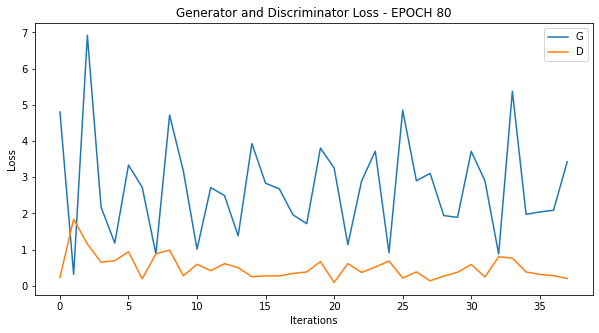

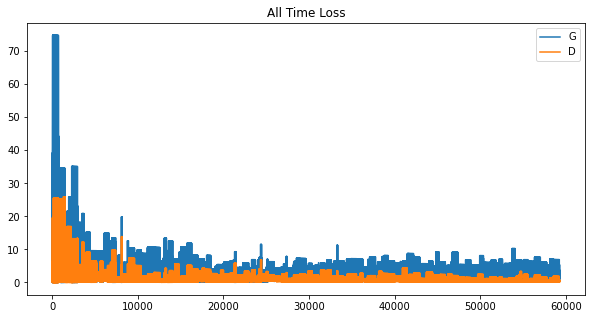

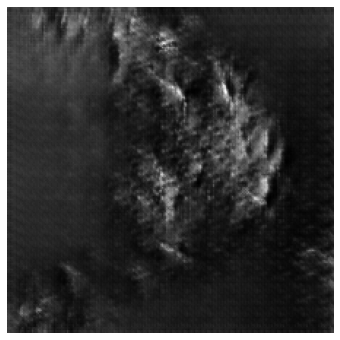

 29%|███████████████████████▏                                                         | 80/280 [22:03<55:17, 16.59s/it]

Epoch: 80 computed for 16.929686307907104 sec
Gen_loss mean:  2.7294166  std:  1.3951062
Disc_loss mean:  0.5084255  std:  0.3356981


 29%|███████████████████████▍                                                         | 81/280 [22:19<55:01, 16.59s/it]

Epoch: 81 computed for 16.59091329574585 sec
Gen_loss mean:  2.8576875  std:  1.4468985
Disc_loss mean:  0.47393838  std:  0.2867099


 29%|███████████████████████▋                                                         | 82/280 [22:36<54:30, 16.52s/it]

Epoch: 82 computed for 16.353809118270874 sec
Gen_loss mean:  2.8225205  std:  1.6273378
Disc_loss mean:  0.44298357  std:  0.47036615


 30%|████████████████████████                                                         | 83/280 [22:52<54:05, 16.48s/it]

Epoch: 83 computed for 16.377752542495728 sec
Gen_loss mean:  2.9444444  std:  1.9064665
Disc_loss mean:  0.46115804  std:  0.40210474


 30%|████████████████████████▎                                                        | 84/280 [23:09<53:57, 16.52s/it]

Epoch: 84 computed for 16.608481884002686 sec
Gen_loss mean:  2.8973186  std:  1.5985802
Disc_loss mean:  0.4501102  std:  0.3565109


 30%|████████████████████████▌                                                        | 85/280 [23:25<53:33, 16.48s/it]

Epoch: 85 computed for 16.395419359207153 sec
Gen_loss mean:  3.0271056  std:  1.8585287
Disc_loss mean:  0.7792385  std:  1.0237278


 31%|████████████████████████▉                                                        | 86/280 [23:41<53:12, 16.46s/it]

Epoch: 86 computed for 16.400209188461304 sec
Gen_loss mean:  2.2300463  std:  0.8577813
Disc_loss mean:  0.4525555  std:  0.21439777


 31%|█████████████████████████▏                                                       | 87/280 [23:58<52:52, 16.44s/it]

Epoch: 87 computed for 16.397942066192627 sec
Gen_loss mean:  2.5162392  std:  1.1033062
Disc_loss mean:  0.4109056  std:  0.26385486


 31%|█████████████████████████▍                                                       | 88/280 [24:14<52:40, 16.46s/it]

Epoch: 88 computed for 16.50970697402954 sec
Gen_loss mean:  2.5537293  std:  1.6839089
Disc_loss mean:  0.61228186  std:  0.41878772


 32%|█████████████████████████▋                                                       | 89/280 [24:31<52:19, 16.44s/it]

Epoch: 89 computed for 16.378269910812378 sec
Gen_loss mean:  2.475538  std:  1.0572127
Disc_loss mean:  0.4541247  std:  0.25855324


 32%|██████████████████████████                                                       | 90/280 [24:47<52:01, 16.43s/it]

Epoch: 90 computed for 16.407570600509644 sec
Gen_loss mean:  2.8362966  std:  1.5073642
Disc_loss mean:  0.5002884  std:  0.2739735


 32%|██████████████████████████▎                                                      | 91/280 [25:03<51:38, 16.39s/it]

Epoch: 91 computed for 16.30640435218811 sec
Gen_loss mean:  2.5969317  std:  1.3155587
Disc_loss mean:  0.51504487  std:  0.33947903


 33%|██████████████████████████▌                                                      | 92/280 [25:20<51:20, 16.39s/it]

Epoch: 92 computed for 16.375284433364868 sec
Gen_loss mean:  2.5550518  std:  1.3683056
Disc_loss mean:  0.5205817  std:  0.25164443


 33%|██████████████████████████▉                                                      | 93/280 [25:36<50:53, 16.33s/it]

Epoch: 93 computed for 16.1872239112854 sec
Gen_loss mean:  2.731905  std:  1.5503947
Disc_loss mean:  0.7122946  std:  0.73966336


 34%|███████████████████████████▏                                                     | 94/280 [25:52<50:32, 16.30s/it]

Epoch: 94 computed for 16.239561319351196 sec
Gen_loss mean:  2.3251836  std:  1.2765545
Disc_loss mean:  0.7330738  std:  0.5064222


 34%|███████████████████████████▍                                                     | 95/280 [26:09<50:33, 16.40s/it]

Epoch: 95 computed for 16.619544982910156 sec
Gen_loss mean:  2.4413996  std:  1.2926849
Disc_loss mean:  0.5557447  std:  0.46866807


 34%|███████████████████████████▊                                                     | 96/280 [26:26<50:49, 16.57s/it]

Epoch: 96 computed for 16.980578660964966 sec
Gen_loss mean:  2.4121978  std:  1.1635348
Disc_loss mean:  0.4957566  std:  0.23593754


 35%|████████████████████████████                                                     | 97/280 [26:43<50:55, 16.70s/it]

Epoch: 97 computed for 16.97658896446228 sec
Gen_loss mean:  2.6349907  std:  1.3837378
Disc_loss mean:  0.4661133  std:  0.27296808


 35%|████████████████████████████▎                                                    | 98/280 [27:00<50:53, 16.78s/it]

Epoch: 98 computed for 16.97359871864319 sec
Gen_loss mean:  2.5677345  std:  1.1582913
Disc_loss mean:  0.40027723  std:  0.19707203


 35%|████████████████████████████▋                                                    | 99/280 [27:17<50:58, 16.90s/it]

Epoch: 99 computed for 17.18109440803528 sec
Gen_loss mean:  2.5840695  std:  1.210068
Disc_loss mean:  0.44585413  std:  0.22832166


 36%|████████████████████████████▌                                                   | 100/280 [27:34<50:43, 16.91s/it]

Epoch: 100 computed for 16.932706356048584 sec
Gen_loss mean:  2.3220475  std:  0.975629
Disc_loss mean:  0.46500754  std:  0.26481223


 36%|████████████████████████████▊                                                   | 101/280 [27:51<50:35, 16.96s/it]

Epoch: 101 computed for 17.057385206222534 sec
Gen_loss mean:  2.5545025  std:  1.4542636
Disc_loss mean:  0.5151504  std:  0.34122765


 36%|█████████████████████████████▏                                                  | 102/280 [28:08<50:18, 16.96s/it]

Epoch: 102 computed for 16.960626125335693 sec
Gen_loss mean:  2.7036579  std:  1.3862967
Disc_loss mean:  0.4838676  std:  0.31229848


 37%|█████████████████████████████▍                                                  | 103/280 [28:25<49:59, 16.95s/it]

Epoch: 103 computed for 16.91475486755371 sec
Gen_loss mean:  2.629533  std:  1.2317979
Disc_loss mean:  0.41850024  std:  0.19132291


 37%|█████████████████████████████▋                                                  | 104/280 [28:42<49:46, 16.97s/it]

Epoch: 104 computed for 17.01448917388916 sec
Gen_loss mean:  2.4786978  std:  1.1025457
Disc_loss mean:  0.45597267  std:  0.25211203


 38%|██████████████████████████████                                                  | 105/280 [28:59<49:26, 16.95s/it]

Epoch: 105 computed for 16.903784036636353 sec
Gen_loss mean:  2.6895661  std:  1.3482443
Disc_loss mean:  0.46372625  std:  0.35754272


 38%|██████████████████████████████▎                                                 | 106/280 [29:16<49:22, 17.03s/it]

Epoch: 106 computed for 17.203500986099243 sec
Gen_loss mean:  2.5915585  std:  1.0319225
Disc_loss mean:  0.38754997  std:  0.18011978


 38%|██████████████████████████████▌                                                 | 107/280 [29:33<48:55, 16.97s/it]

Epoch: 107 computed for 16.83151388168335 sec
Gen_loss mean:  2.6322632  std:  0.90986395
Disc_loss mean:  0.3105102  std:  0.118054405


 39%|██████████████████████████████▊                                                 | 108/280 [29:49<48:06, 16.78s/it]

Epoch: 108 computed for 16.347013473510742 sec
Gen_loss mean:  2.7881415  std:  1.1293732
Disc_loss mean:  0.31577492  std:  0.13171539


 39%|███████████████████████████████▏                                                | 109/280 [30:06<47:37, 16.71s/it]

Epoch: 109 computed for 16.539002418518066 sec
Gen_loss mean:  2.666775  std:  1.2348224
Disc_loss mean:  0.43849826  std:  0.26702276


 39%|███████████████████████████████▍                                                | 110/280 [30:22<47:08, 16.64s/it]

Epoch: 110 computed for 16.465643882751465 sec
Gen_loss mean:  2.844104  std:  1.5587267
Disc_loss mean:  0.46650496  std:  0.44813624


 40%|███████████████████████████████▋                                                | 111/280 [30:39<46:43, 16.59s/it]

Epoch: 111 computed for 16.472432851791382 sec
Gen_loss mean:  2.8111668  std:  1.6821625
Disc_loss mean:  0.56597453  std:  0.4880899


 40%|████████████████████████████████                                                | 112/280 [30:55<46:18, 16.54s/it]

Epoch: 112 computed for 16.428154945373535 sec
Gen_loss mean:  2.7654846  std:  1.4526294
Disc_loss mean:  0.53154355  std:  0.5099263


 40%|████████████████████████████████▎                                               | 113/280 [31:12<46:03, 16.55s/it]

Epoch: 113 computed for 16.55981707572937 sec
Gen_loss mean:  2.507087  std:  1.1398188
Disc_loss mean:  0.4544242  std:  0.28884152


 41%|████████████████████████████████▌                                               | 114/280 [31:28<45:42, 16.52s/it]

Epoch: 114 computed for 16.46051859855652 sec
Gen_loss mean:  2.6073263  std:  1.1234205
Disc_loss mean:  0.43370453  std:  0.41790718


 41%|████████████████████████████████▊                                               | 115/280 [31:44<45:21, 16.50s/it]

Epoch: 115 computed for 16.43282389640808 sec
Gen_loss mean:  2.7170382  std:  0.98151475
Disc_loss mean:  0.32294798  std:  0.13524553


 41%|█████████████████████████████████▏                                              | 116/280 [32:01<45:02, 16.48s/it]

Epoch: 116 computed for 16.43594217300415 sec
Gen_loss mean:  2.7933435  std:  1.1230916
Disc_loss mean:  0.30875513  std:  0.15143193


 42%|█████████████████████████████████▍                                              | 117/280 [32:18<44:51, 16.51s/it]

Epoch: 117 computed for 16.590460777282715 sec
Gen_loss mean:  2.7146559  std:  0.9232212
Disc_loss mean:  0.29699615  std:  0.12687312


 42%|█████████████████████████████████▋                                              | 118/280 [32:34<44:31, 16.49s/it]

Epoch: 118 computed for 16.436179876327515 sec
Gen_loss mean:  3.0096784  std:  1.3061898
Disc_loss mean:  0.34447393  std:  0.28075874


 42%|██████████████████████████████████                                              | 119/280 [32:50<44:11, 16.47s/it]

Epoch: 119 computed for 16.42293906211853 sec
Gen_loss mean:  2.989045  std:  1.4448763
Disc_loss mean:  0.35436845  std:  0.21394023


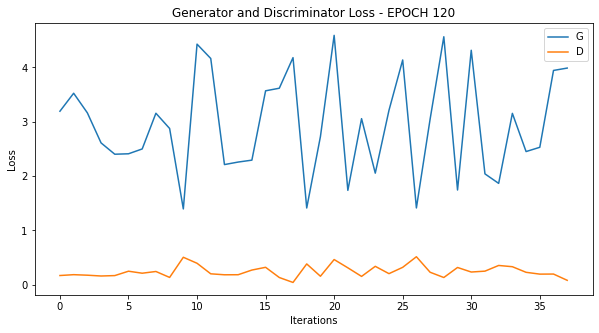

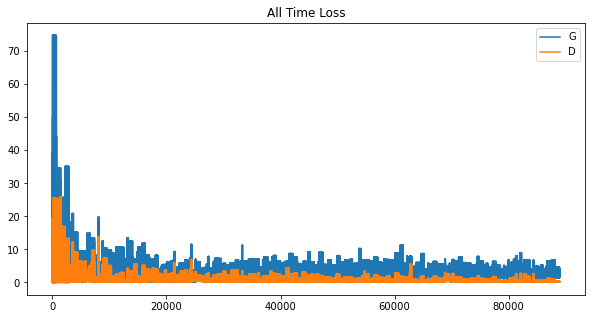

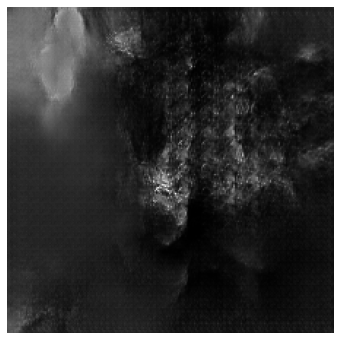

 43%|██████████████████████████████████▎                                             | 120/280 [33:07<44:25, 16.66s/it]

Epoch: 120 computed for 17.08991050720215 sec
Gen_loss mean:  2.9459798  std:  0.93088454
Disc_loss mean:  0.24736185  std:  0.10836724


 43%|██████████████████████████████████▌                                             | 121/280 [33:24<43:57, 16.59s/it]

Epoch: 121 computed for 16.41540789604187 sec
Gen_loss mean:  2.689036  std:  0.72950065
Disc_loss mean:  0.25012648  std:  0.08594151


 44%|██████████████████████████████████▊                                             | 122/280 [33:40<43:34, 16.55s/it]

Epoch: 122 computed for 16.45195460319519 sec
Gen_loss mean:  3.0690887  std:  1.5750976
Disc_loss mean:  0.6123456  std:  0.68626904


 44%|███████████████████████████████████▏                                            | 123/280 [33:57<43:14, 16.53s/it]

Epoch: 123 computed for 16.483336925506592 sec
Gen_loss mean:  2.6534941  std:  1.038828
Disc_loss mean:  0.39459676  std:  0.19733876


 44%|███████████████████████████████████▍                                            | 124/280 [34:13<43:00, 16.54s/it]

Epoch: 124 computed for 16.56532120704651 sec
Gen_loss mean:  2.6500537  std:  1.0532728
Disc_loss mean:  0.3546126  std:  0.2376588


 45%|███████████████████████████████████▋                                            | 125/280 [34:30<42:37, 16.50s/it]

Epoch: 125 computed for 16.39977741241455 sec
Gen_loss mean:  2.702485  std:  0.8744239
Disc_loss mean:  0.28497222  std:  0.10031807


 45%|████████████████████████████████████                                            | 126/280 [34:46<42:15, 16.46s/it]

Epoch: 126 computed for 16.37909173965454 sec
Gen_loss mean:  2.8316853  std:  1.0171361
Disc_loss mean:  0.2573692  std:  0.09784958


 45%|████████████████████████████████████▎                                           | 127/280 [35:03<41:57, 16.45s/it]

Epoch: 127 computed for 16.42584776878357 sec
Gen_loss mean:  2.8665025  std:  0.94375914
Disc_loss mean:  0.23786755  std:  0.08089931


 46%|████████████████████████████████████▌                                           | 128/280 [35:19<41:44, 16.48s/it]

Epoch: 128 computed for 16.539719343185425 sec
Gen_loss mean:  3.0512877  std:  1.1024871
Disc_loss mean:  0.26676083  std:  0.12680984


 46%|████████████████████████████████████▊                                           | 129/280 [35:36<41:27, 16.47s/it]

Epoch: 129 computed for 16.460436582565308 sec
Gen_loss mean:  3.0772352  std:  1.3314686
Disc_loss mean:  0.29422492  std:  0.17756242


 46%|█████████████████████████████████████▏                                          | 130/280 [35:52<41:04, 16.43s/it]

Epoch: 130 computed for 16.32233953475952 sec
Gen_loss mean:  2.970353  std:  1.690494
Disc_loss mean:  0.8889122  std:  0.85863763


 47%|█████████████████████████████████████▍                                          | 131/280 [36:08<40:40, 16.38s/it]

Epoch: 131 computed for 16.255327224731445 sec
Gen_loss mean:  2.5940022  std:  1.0360812
Disc_loss mean:  0.38701844  std:  0.19227754


 47%|█████████████████████████████████████▋                                          | 132/280 [36:25<40:21, 16.36s/it]

Epoch: 132 computed for 16.314809322357178 sec
Gen_loss mean:  2.6260707  std:  0.7487852
Disc_loss mean:  0.33115286  std:  0.12164785


 48%|██████████████████████████████████████                                          | 133/280 [36:41<40:04, 16.36s/it]

Epoch: 133 computed for 16.352508783340454 sec
Gen_loss mean:  2.7668247  std:  0.99874806
Disc_loss mean:  0.30398667  std:  0.15006241


 48%|██████████████████████████████████████▎                                         | 134/280 [36:57<39:43, 16.33s/it]

Epoch: 134 computed for 16.249595880508423 sec
Gen_loss mean:  2.7961407  std:  0.64994437
Disc_loss mean:  0.21846378  std:  0.064570524


 48%|██████████████████████████████████████▌                                         | 135/280 [37:13<39:25, 16.31s/it]

Epoch: 135 computed for 16.273176670074463 sec
Gen_loss mean:  3.1165438  std:  1.3044438
Disc_loss mean:  0.26876462  std:  0.16805106


 49%|██████████████████████████████████████▊                                         | 136/280 [37:30<39:07, 16.30s/it]

Epoch: 136 computed for 16.269381284713745 sec
Gen_loss mean:  3.140358  std:  1.1430982
Disc_loss mean:  0.23289344  std:  0.13554157


 49%|███████████████████████████████████████▏                                        | 137/280 [37:46<38:47, 16.28s/it]

Epoch: 137 computed for 16.22021174430847 sec
Gen_loss mean:  3.2122505  std:  0.9465383
Disc_loss mean:  0.18656562  std:  0.068584606


 49%|███████████████████████████████████████▍                                        | 138/280 [38:02<38:29, 16.27s/it]

Epoch: 138 computed for 16.242388010025024 sec
Gen_loss mean:  3.1527407  std:  0.9982168
Disc_loss mean:  0.17051874  std:  0.052563198


 50%|███████████████████████████████████████▋                                        | 139/280 [38:18<38:12, 16.26s/it]

Epoch: 139 computed for 16.23502206802368 sec
Gen_loss mean:  3.2051358  std:  1.0703849
Disc_loss mean:  0.20105658  std:  0.09380085


 50%|████████████████████████████████████████                                        | 140/280 [38:35<37:56, 16.26s/it]

Epoch: 140 computed for 16.258143663406372 sec
Gen_loss mean:  3.4461143  std:  1.3378628
Disc_loss mean:  0.2406833  std:  0.1719075


 50%|████████████████████████████████████████▎                                       | 141/280 [38:51<37:41, 16.27s/it]

Epoch: 141 computed for 16.29365372657776 sec
Gen_loss mean:  3.2467132  std:  1.4203045
Disc_loss mean:  0.45447725  std:  0.8131204


 51%|████████████████████████████████████████▌                                       | 142/280 [39:07<37:24, 16.27s/it]

Epoch: 142 computed for 16.256813049316406 sec
Gen_loss mean:  2.8208425  std:  1.5276487
Disc_loss mean:  0.6029855  std:  0.82066923


 51%|████████████████████████████████████████▊                                       | 143/280 [39:23<37:07, 16.26s/it]

Epoch: 143 computed for 16.243829011917114 sec
Gen_loss mean:  2.9051466  std:  1.1419119
Disc_loss mean:  0.31521288  std:  0.17652835


 51%|█████████████████████████████████████████▏                                      | 144/280 [39:40<36:51, 16.26s/it]

Epoch: 144 computed for 16.267189025878906 sec
Gen_loss mean:  2.775991  std:  0.73978996
Disc_loss mean:  0.24573727  std:  0.10022714


 52%|█████████████████████████████████████████▍                                      | 145/280 [39:56<36:34, 16.26s/it]

Epoch: 145 computed for 16.245018482208252 sec
Gen_loss mean:  2.7798357  std:  0.6711243
Disc_loss mean:  0.24762681  std:  0.076542385


 52%|█████████████████████████████████████████▋                                      | 146/280 [40:12<36:19, 16.26s/it]

Epoch: 146 computed for 16.27067518234253 sec
Gen_loss mean:  3.1531136  std:  1.0702256
Disc_loss mean:  0.2057048  std:  0.07346687


 52%|██████████████████████████████████████████                                      | 147/280 [40:28<36:02, 16.26s/it]

Epoch: 147 computed for 16.24181079864502 sec
Gen_loss mean:  3.0856862  std:  0.9167503
Disc_loss mean:  0.19419064  std:  0.10098593


 53%|██████████████████████████████████████████▎                                     | 148/280 [40:45<35:46, 16.26s/it]

Epoch: 148 computed for 16.273135662078857 sec
Gen_loss mean:  3.4062622  std:  1.2314802
Disc_loss mean:  0.21844299  std:  0.13227843


 53%|██████████████████████████████████████████▌                                     | 149/280 [41:01<35:30, 16.26s/it]

Epoch: 149 computed for 16.266683340072632 sec
Gen_loss mean:  3.23874  std:  0.84730166
Disc_loss mean:  0.16493401  std:  0.06649417


 54%|██████████████████████████████████████████▊                                     | 150/280 [41:17<35:16, 16.28s/it]

Epoch: 150 computed for 16.326902151107788 sec
Gen_loss mean:  3.31047  std:  0.9542822
Disc_loss mean:  0.1810633  std:  0.10257025


 54%|███████████████████████████████████████████▏                                    | 151/280 [41:34<34:59, 16.28s/it]

Epoch: 151 computed for 16.25349760055542 sec
Gen_loss mean:  3.2667656  std:  0.7321882
Disc_loss mean:  0.14654382  std:  0.056174617


 54%|███████████████████████████████████████████▍                                    | 152/280 [41:50<34:40, 16.25s/it]

Epoch: 152 computed for 16.19958257675171 sec
Gen_loss mean:  3.4659252  std:  0.9539211
Disc_loss mean:  0.14639896  std:  0.05418878


 55%|███████████████████████████████████████████▋                                    | 153/280 [42:06<34:24, 16.25s/it]

Epoch: 153 computed for 16.247000694274902 sec
Gen_loss mean:  3.4665878  std:  1.8335711
Disc_loss mean:  0.92308986  std:  1.9097357


 55%|████████████████████████████████████████████                                    | 154/280 [42:22<34:08, 16.26s/it]

Epoch: 154 computed for 16.26731276512146 sec
Gen_loss mean:  2.9178078  std:  1.8560326
Disc_loss mean:  1.1119082  std:  0.89011204


 55%|████████████████████████████████████████████▎                                   | 155/280 [42:39<33:53, 16.27s/it]

Epoch: 155 computed for 16.28215265274048 sec
Gen_loss mean:  2.9423637  std:  1.407934
Disc_loss mean:  0.4779664  std:  0.41576895


 56%|████████████████████████████████████████████▌                                   | 156/280 [42:55<33:37, 16.27s/it]

Epoch: 156 computed for 16.2692654132843 sec
Gen_loss mean:  2.6337798  std:  1.0491947
Disc_loss mean:  0.40235394  std:  0.21980476


 56%|████████████████████████████████████████████▊                                   | 157/280 [43:11<33:21, 16.27s/it]

Epoch: 157 computed for 16.28531789779663 sec
Gen_loss mean:  2.7364187  std:  0.92694426
Disc_loss mean:  0.34250453  std:  0.16056794


 56%|█████████████████████████████████████████████▏                                  | 158/280 [43:27<33:05, 16.28s/it]

Epoch: 158 computed for 16.278239011764526 sec
Gen_loss mean:  2.7032666  std:  0.7431483
Disc_loss mean:  0.28152132  std:  0.09563222


 57%|█████████████████████████████████████████████▍                                  | 159/280 [43:44<32:49, 16.27s/it]

Epoch: 159 computed for 16.270587682724 sec
Gen_loss mean:  2.813687  std:  0.55284107
Disc_loss mean:  0.21517633  std:  0.054730136


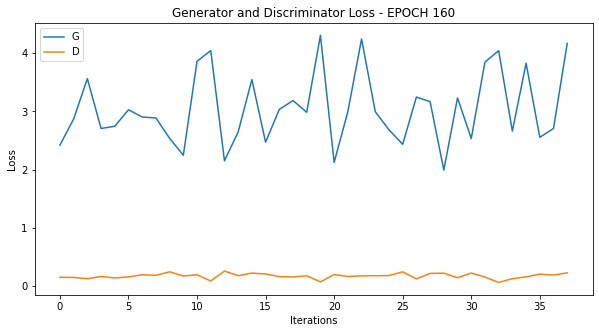

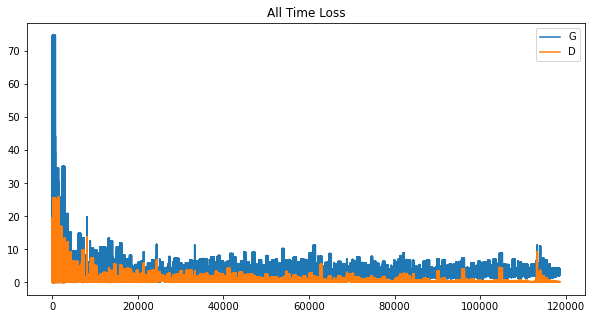

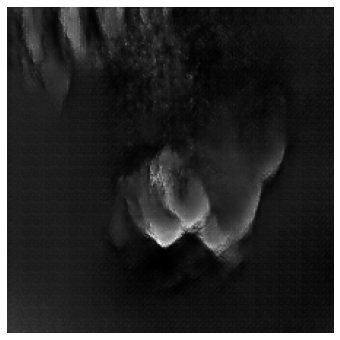

 57%|█████████████████████████████████████████████▋                                  | 160/280 [44:01<32:52, 16.44s/it]

Epoch: 160 computed for 16.81251072883606 sec
Gen_loss mean:  3.0427258  std:  0.6258041
Disc_loss mean:  0.1770714  std:  0.04440994


 57%|██████████████████████████████████████████████                                  | 161/280 [44:17<32:27, 16.36s/it]

Epoch: 161 computed for 16.188978672027588 sec
Gen_loss mean:  3.1793897  std:  0.7763035
Disc_loss mean:  0.16983075  std:  0.060123887


 58%|██████████████████████████████████████████████▎                                 | 162/280 [44:33<32:11, 16.37s/it]

Epoch: 162 computed for 16.372912406921387 sec
Gen_loss mean:  3.272035  std:  0.87690043
Disc_loss mean:  0.1623848  std:  0.06446817


 58%|██████████████████████████████████████████████▌                                 | 163/280 [44:49<31:52, 16.35s/it]

Epoch: 163 computed for 16.30340600013733 sec
Gen_loss mean:  3.2752702  std:  1.7975601
Disc_loss mean:  0.4105462  std:  0.7778977


 59%|██████████████████████████████████████████████▊                                 | 164/280 [45:06<31:34, 16.33s/it]

Epoch: 164 computed for 16.29647922515869 sec
Gen_loss mean:  3.3533773  std:  1.6600505
Disc_loss mean:  0.6984747  std:  1.2577952


 59%|███████████████████████████████████████████████▏                                | 165/280 [45:22<31:16, 16.32s/it]

Epoch: 165 computed for 16.271419525146484 sec
Gen_loss mean:  2.8298292  std:  0.6746785
Disc_loss mean:  0.24546245  std:  0.0991757


 59%|███████████████████████████████████████████████▍                                | 166/280 [45:38<30:59, 16.31s/it]

Epoch: 166 computed for 16.291731595993042 sec
Gen_loss mean:  3.2782466  std:  1.0604767
Disc_loss mean:  0.21344978  std:  0.09279348


 60%|███████████████████████████████████████████████▋                                | 167/280 [45:55<30:40, 16.29s/it]

Epoch: 167 computed for 16.241991996765137 sec
Gen_loss mean:  3.034497  std:  0.65711623
Disc_loss mean:  0.20513609  std:  0.06937603


 60%|████████████████████████████████████████████████                                | 168/280 [46:11<30:22, 16.27s/it]

Epoch: 168 computed for 16.235263109207153 sec
Gen_loss mean:  3.2342677  std:  0.7436812
Disc_loss mean:  0.17443526  std:  0.06899957


 60%|████████████████████████████████████████████████▎                               | 169/280 [46:27<30:06, 16.27s/it]

Epoch: 169 computed for 16.26642608642578 sec
Gen_loss mean:  3.4535985  std:  0.8402521
Disc_loss mean:  0.15340228  std:  0.06496894


 61%|████████████████████████████████████████████████▌                               | 170/280 [46:43<29:49, 16.27s/it]

Epoch: 170 computed for 16.252260446548462 sec
Gen_loss mean:  3.358174  std:  0.99080384
Disc_loss mean:  0.181725  std:  0.1168595


 61%|████████████████████████████████████████████████▊                               | 171/280 [47:00<29:36, 16.30s/it]

Epoch: 171 computed for 16.37669038772583 sec
Gen_loss mean:  3.6070955  std:  0.9730817
Disc_loss mean:  0.14256352  std:  0.0650948


 61%|█████████████████████████████████████████████████▏                              | 172/280 [47:16<29:17, 16.28s/it]

Epoch: 172 computed for 16.222363233566284 sec
Gen_loss mean:  3.6559188  std:  1.0948528
Disc_loss mean:  0.1381508  std:  0.06943091


 62%|█████████████████████████████████████████████████▍                              | 173/280 [47:32<29:01, 16.28s/it]

Epoch: 173 computed for 16.27843737602234 sec
Gen_loss mean:  3.816215  std:  1.1871678
Disc_loss mean:  0.12942396  std:  0.04984941


 62%|█████████████████████████████████████████████████▋                              | 174/280 [47:48<28:43, 16.26s/it]

Epoch: 174 computed for 16.21587038040161 sec
Gen_loss mean:  3.9435964  std:  1.0813607
Disc_loss mean:  0.09915732  std:  0.040420298


 62%|██████████████████████████████████████████████████                              | 175/280 [48:05<28:26, 16.25s/it]

Epoch: 175 computed for 16.226495504379272 sec
Gen_loss mean:  3.875777  std:  2.0569286
Disc_loss mean:  0.63461584  std:  1.0858201


 63%|██████████████████████████████████████████████████▎                             | 176/280 [48:21<28:08, 16.23s/it]

Epoch: 176 computed for 16.189181089401245 sec
Gen_loss mean:  3.6513004  std:  1.6720971
Disc_loss mean:  0.3438127  std:  0.30092385


 63%|██████████████████████████████████████████████████▌                             | 177/280 [48:37<27:52, 16.24s/it]

Epoch: 177 computed for 16.25270390510559 sec
Gen_loss mean:  3.2813966  std:  0.946444
Disc_loss mean:  0.20060448  std:  0.10883901


 64%|██████████████████████████████████████████████████▊                             | 178/280 [48:53<27:37, 16.25s/it]

Epoch: 178 computed for 16.257270574569702 sec
Gen_loss mean:  3.0469277  std:  0.5546011
Disc_loss mean:  0.18078698  std:  0.050402306


 64%|███████████████████████████████████████████████████▏                            | 179/280 [49:10<27:22, 16.26s/it]

Epoch: 179 computed for 16.287781238555908 sec
Gen_loss mean:  3.4501495  std:  0.7085885
Disc_loss mean:  0.15117109  std:  0.054806076


 64%|███████████████████████████████████████████████████▍                            | 180/280 [49:26<27:06, 16.26s/it]

Epoch: 180 computed for 16.26697850227356 sec
Gen_loss mean:  3.455692  std:  0.6498703
Disc_loss mean:  0.12603067  std:  0.048652183


 65%|███████████████████████████████████████████████████▋                            | 181/280 [49:42<26:50, 16.27s/it]

Epoch: 181 computed for 16.27577519416809 sec
Gen_loss mean:  3.5539086  std:  0.86953694
Disc_loss mean:  0.12559466  std:  0.049984753


 65%|████████████████████████████████████████████████████                            | 182/280 [49:58<26:31, 16.24s/it]

Epoch: 182 computed for 16.188686847686768 sec
Gen_loss mean:  3.739128  std:  0.90275687
Disc_loss mean:  0.11307113  std:  0.06747337


 65%|████████████████████████████████████████████████████▎                           | 183/280 [50:15<26:15, 16.24s/it]

Epoch: 183 computed for 16.232918977737427 sec
Gen_loss mean:  3.739938  std:  0.7598339
Disc_loss mean:  0.09677785  std:  0.030069478


 66%|████████████████████████████████████████████████████▌                           | 184/280 [50:31<26:00, 16.25s/it]

Epoch: 184 computed for 16.278841018676758 sec
Gen_loss mean:  4.0311956  std:  0.98811007
Disc_loss mean:  0.08911569  std:  0.03923465


 66%|████████████████████████████████████████████████████▊                           | 185/280 [50:47<25:44, 16.25s/it]

Epoch: 185 computed for 16.252054452896118 sec
Gen_loss mean:  3.975802  std:  0.9006672
Disc_loss mean:  0.0830464  std:  0.039688434


 66%|█████████████████████████████████████████████████████▏                          | 186/280 [51:03<25:27, 16.25s/it]

Epoch: 186 computed for 16.224063634872437 sec
Gen_loss mean:  4.1686115  std:  1.2956944
Disc_loss mean:  0.11082011  std:  0.0673942


 67%|█████████████████████████████████████████████████████▍                          | 187/280 [51:20<25:11, 16.25s/it]

Epoch: 187 computed for 16.25188946723938 sec
Gen_loss mean:  4.2289643  std:  1.1597552
Disc_loss mean:  0.08474567  std:  0.045462906


 67%|█████████████████████████████████████████████████████▋                          | 188/280 [51:36<24:53, 16.24s/it]

Epoch: 188 computed for 16.208876132965088 sec
Gen_loss mean:  4.297162  std:  1.4104446
Disc_loss mean:  0.13654949  std:  0.13531342


 68%|██████████████████████████████████████████████████████                          | 189/280 [51:52<24:38, 16.25s/it]

Epoch: 189 computed for 16.276634693145752 sec
Gen_loss mean:  4.018781  std:  0.86400265
Disc_loss mean:  0.0919411  std:  0.040397845


 68%|██████████████████████████████████████████████████████▎                         | 190/280 [52:08<24:22, 16.25s/it]

Epoch: 190 computed for 16.252378463745117 sec
Gen_loss mean:  4.1152134  std:  1.1589327
Disc_loss mean:  0.10512161  std:  0.07504758


 68%|██████████████████████████████████████████████████████▌                         | 191/280 [52:25<24:05, 16.24s/it]

Epoch: 191 computed for 16.2261803150177 sec
Gen_loss mean:  4.4050784  std:  1.5914042
Disc_loss mean:  0.10350754  std:  0.08105777


 69%|██████████████████████████████████████████████████████▊                         | 192/280 [52:41<23:50, 16.26s/it]

Epoch: 192 computed for 16.296595573425293 sec
Gen_loss mean:  4.330789  std:  1.0994102
Disc_loss mean:  0.08535535  std:  0.045352697


 69%|███████████████████████████████████████████████████████▏                        | 193/280 [52:57<23:35, 16.27s/it]

Epoch: 193 computed for 16.288750886917114 sec
Gen_loss mean:  4.6927533  std:  1.6626074
Disc_loss mean:  0.12371375  std:  0.11328991


 69%|███████████████████████████████████████████████████████▍                        | 194/280 [53:14<23:22, 16.30s/it]

Epoch: 194 computed for 16.379900455474854 sec
Gen_loss mean:  4.7368846  std:  1.3718858
Disc_loss mean:  0.07567649  std:  0.049662292


 70%|███████████████████████████████████████████████████████▋                        | 195/280 [53:30<23:06, 16.31s/it]

Epoch: 195 computed for 16.33302664756775 sec
Gen_loss mean:  4.6539354  std:  1.3319234
Disc_loss mean:  0.07382336  std:  0.043279644


 70%|████████████████████████████████████████████████████████                        | 196/280 [53:46<22:50, 16.32s/it]

Epoch: 196 computed for 16.32883644104004 sec
Gen_loss mean:  4.7555  std:  1.5297022
Disc_loss mean:  0.08503395  std:  0.06924253


 70%|████████████████████████████████████████████████████████▎                       | 197/280 [54:02<22:33, 16.31s/it]

Epoch: 197 computed for 16.284210681915283 sec
Gen_loss mean:  4.8136334  std:  1.5425471
Disc_loss mean:  0.06697441  std:  0.035731852


 71%|████████████████████████████████████████████████████████▌                       | 198/280 [54:19<22:17, 16.31s/it]

Epoch: 198 computed for 16.318456411361694 sec
Gen_loss mean:  4.829319  std:  1.3788298
Disc_loss mean:  0.06299289  std:  0.03473418


 71%|████████████████████████████████████████████████████████▊                       | 199/280 [54:35<22:00, 16.30s/it]

Epoch: 199 computed for 16.278325080871582 sec
Gen_loss mean:  4.7642913  std:  2.4023392
Disc_loss mean:  0.5150978  std:  1.4242339


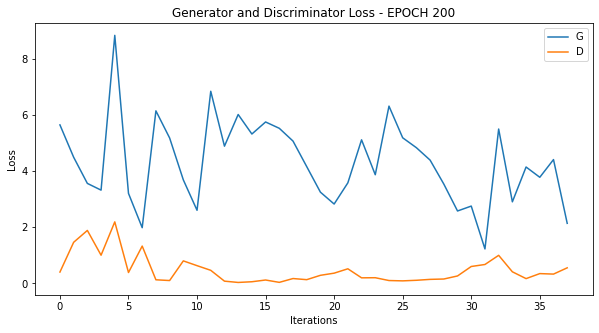

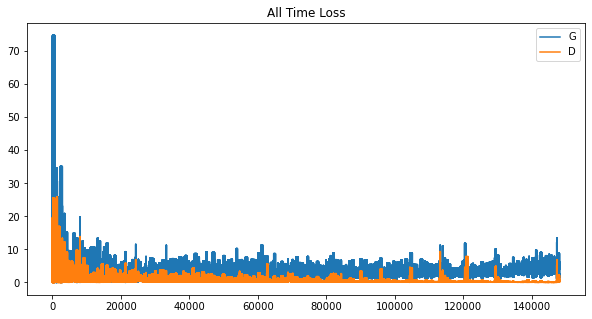

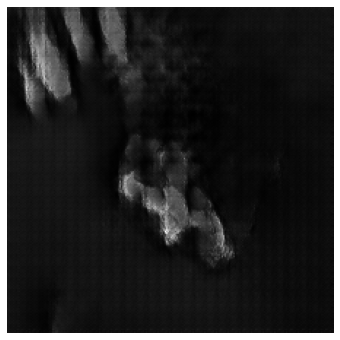

 71%|█████████████████████████████████████████████████████████▏                      | 200/280 [54:52<21:56, 16.46s/it]

Epoch: 200 computed for 16.809267282485962 sec
Gen_loss mean:  4.3315134  std:  1.5073953
Disc_loss mean:  0.47420207  std:  0.5057554


 72%|█████████████████████████████████████████████████████████▍                      | 201/280 [55:08<21:34, 16.38s/it]

Epoch: 201 computed for 16.20410418510437 sec
Gen_loss mean:  3.6471195  std:  1.5654808
Disc_loss mean:  0.30328336  std:  0.21222405


 72%|█████████████████████████████████████████████████████████▋                      | 202/280 [55:24<21:12, 16.32s/it]

Epoch: 202 computed for 16.16544461250305 sec
Gen_loss mean:  3.433044  std:  1.1268905
Disc_loss mean:  0.23652825  std:  0.124104224


 72%|████████████████████████████████████████████████████▉                    | 203/280 [2:01:23<25:38:53, 1199.13s/it]

Epoch: 203 computed for 3959.027673959732 sec
Gen_loss mean:  3.3887117  std:  0.5742893
Disc_loss mean:  0.17332742  std:  0.07064256


 73%|█████████████████████████████████████████████████████▉                    | 204/280 [2:01:39<17:49:17, 844.18s/it]

Epoch: 204 computed for 15.949724912643433 sec
Gen_loss mean:  3.5604331  std:  0.76447195
Disc_loss mean:  0.14041857  std:  0.063896224


 73%|██████████████████████████████████████████████████████▏                   | 205/280 [2:01:55<12:24:42, 595.77s/it]

Epoch: 205 computed for 16.136033058166504 sec
Gen_loss mean:  3.571614  std:  0.65180796
Disc_loss mean:  0.12830876  std:  0.03913284


 74%|███████████████████████████████████████████████████████▏                   | 206/280 [2:02:11<8:40:12, 421.79s/it]

Epoch: 206 computed for 15.829936027526855 sec
Gen_loss mean:  3.7675898  std:  0.536465
Disc_loss mean:  0.105637826  std:  0.033922773


 74%|███████████████████████████████████████████████████████▍                   | 207/280 [2:02:27<6:04:54, 299.93s/it]

Epoch: 207 computed for 15.596616983413696 sec
Gen_loss mean:  3.8584929  std:  0.70363384
Disc_loss mean:  0.10010664  std:  0.038001537


 74%|███████████████████████████████████████████████████████▋                   | 208/280 [2:02:42<4:17:34, 214.65s/it]

Epoch: 208 computed for 15.647595405578613 sec
Gen_loss mean:  3.9233367  std:  0.49464753
Disc_loss mean:  0.0842729  std:  0.020137087


 75%|███████████████████████████████████████████████████████▉                   | 209/280 [2:02:58<3:03:25, 155.01s/it]

Epoch: 209 computed for 15.84322476387024 sec
Gen_loss mean:  3.8615768  std:  0.35249895
Disc_loss mean:  0.07954886  std:  0.019976676


 75%|████████████████████████████████████████████████████████▎                  | 210/280 [2:03:14<2:12:13, 113.34s/it]

Epoch: 210 computed for 16.122992038726807 sec
Gen_loss mean:  4.1176734  std:  0.7648592
Disc_loss mean:  0.085508004  std:  0.035284456


 75%|█████████████████████████████████████████████████████████▎                  | 211/280 [2:03:30<1:36:46, 84.16s/it]

Epoch: 211 computed for 16.057326555252075 sec
Gen_loss mean:  4.1119137  std:  0.6452964
Disc_loss mean:  0.07582762  std:  0.022610841


 76%|█████████████████████████████████████████████████████████▌                  | 212/280 [2:03:47<1:12:14, 63.74s/it]

Epoch: 212 computed for 16.091593503952026 sec
Gen_loss mean:  4.092594  std:  0.7139081
Disc_loss mean:  0.07507912  std:  0.025474913


 76%|███████████████████████████████████████████████████████████▎                  | 213/280 [2:04:03<55:15, 49.48s/it]

Epoch: 213 computed for 16.210596084594727 sec
Gen_loss mean:  4.255097  std:  0.9082313
Disc_loss mean:  0.07449139  std:  0.03390606


 76%|███████████████████████████████████████████████████████████▌                  | 214/280 [2:04:19<43:29, 39.53s/it]

Epoch: 214 computed for 16.311964988708496 sec
Gen_loss mean:  4.1235003  std:  0.4997425
Disc_loss mean:  0.064466625  std:  0.01622829


 77%|███████████████████████████████████████████████████████████▉                  | 215/280 [2:04:35<35:15, 32.54s/it]

Epoch: 215 computed for 16.23388123512268 sec
Gen_loss mean:  4.2857804  std:  0.67976636
Disc_loss mean:  0.06557531  std:  0.023595098


 77%|████████████████████████████████████████████████████████████▏                 | 216/280 [2:04:52<29:30, 27.66s/it]

Epoch: 216 computed for 16.268343448638916 sec
Gen_loss mean:  4.3362403  std:  0.70759916
Disc_loss mean:  0.063230075  std:  0.024996387


 78%|████████████████████████████████████████████████████████████▍                 | 217/280 [2:05:08<25:29, 24.27s/it]

Epoch: 217 computed for 16.36423683166504 sec
Gen_loss mean:  4.3304615  std:  0.9014006
Disc_loss mean:  0.06725381  std:  0.037993174


 78%|████████████████████████████████████████████████████████████▋                 | 218/280 [2:05:24<22:35, 21.87s/it]

Epoch: 218 computed for 16.259251356124878 sec
Gen_loss mean:  3.3570635  std:  2.0190668
Disc_loss mean:  1.258127  std:  1.2101265


 78%|█████████████████████████████████████████████████████████████                 | 219/280 [2:05:41<20:32, 20.20s/it]

Epoch: 219 computed for 16.31514620780945 sec
Gen_loss mean:  3.3711512  std:  1.074861
Disc_loss mean:  0.2807505  std:  0.14633301


 79%|█████████████████████████████████████████████████████████████▎                | 220/280 [2:05:57<19:01, 19.03s/it]

Epoch: 220 computed for 16.288387537002563 sec
Gen_loss mean:  3.6552882  std:  1.4211583
Disc_loss mean:  0.32082152  std:  0.3378102


 79%|█████████████████████████████████████████████████████████████▌                | 221/280 [2:06:13<17:56, 18.25s/it]

Epoch: 221 computed for 16.41461706161499 sec
Gen_loss mean:  3.5433526  std:  1.1716354
Disc_loss mean:  0.21071701  std:  0.12038718


 79%|█████████████████████████████████████████████████████████████▊                | 222/280 [2:06:30<17:06, 17.69s/it]

Epoch: 222 computed for 16.39270544052124 sec
Gen_loss mean:  3.6411457  std:  0.74129313
Disc_loss mean:  0.15287016  std:  0.06283658


 80%|██████████████████████████████████████████████████████████████                | 223/280 [2:06:46<16:33, 17.42s/it]

Epoch: 223 computed for 16.7971932888031 sec
Gen_loss mean:  3.6896877  std:  0.6353573
Disc_loss mean:  0.12643948  std:  0.04412889


 80%|██████████████████████████████████████████████████████████████▍               | 224/280 [2:07:03<15:59, 17.13s/it]

Epoch: 224 computed for 16.44190263748169 sec
Gen_loss mean:  3.7457464  std:  0.6178857
Disc_loss mean:  0.11230214  std:  0.031957332


 80%|██████████████████████████████████████████████████████████████▋               | 225/280 [2:07:20<15:33, 16.97s/it]

Epoch: 225 computed for 16.582393884658813 sec
Gen_loss mean:  3.925192  std:  0.76280606
Disc_loss mean:  0.09887687  std:  0.049355738


 81%|██████████████████████████████████████████████████████████████▉               | 226/280 [2:07:36<15:09, 16.85s/it]

Epoch: 226 computed for 16.574915885925293 sec
Gen_loss mean:  4.039884  std:  0.81173843
Disc_loss mean:  0.0875234  std:  0.03441465


 81%|███████████████████████████████████████████████████████████████▏              | 227/280 [2:07:53<14:49, 16.78s/it]

Epoch: 227 computed for 16.618622064590454 sec
Gen_loss mean:  4.2867675  std:  1.0322324
Disc_loss mean:  0.09467096  std:  0.04462845


 81%|███████████████████████████████████████████████████████████████▌              | 228/280 [2:08:09<14:32, 16.78s/it]

Epoch: 228 computed for 16.790804147720337 sec
Gen_loss mean:  4.3418174  std:  1.4337913
Disc_loss mean:  0.19599856  std:  0.21342805


 82%|███████████████████████████████████████████████████████████████▊              | 229/280 [2:08:26<14:09, 16.66s/it]

Epoch: 229 computed for 16.373517990112305 sec
Gen_loss mean:  4.074374  std:  1.2234404
Disc_loss mean:  0.14068861  std:  0.0733729


 82%|████████████████████████████████████████████████████████████████              | 230/280 [2:08:42<13:48, 16.56s/it]

Epoch: 230 computed for 16.333248615264893 sec
Gen_loss mean:  4.0230746  std:  0.660963
Disc_loss mean:  0.08722427  std:  0.03616933


 82%|████████████████████████████████████████████████████████████████▎             | 231/280 [2:08:59<13:29, 16.51s/it]

Epoch: 231 computed for 16.383379459381104 sec
Gen_loss mean:  4.4547644  std:  1.1894516
Disc_loss mean:  0.08679451  std:  0.06626832


 83%|████████████████████████████████████████████████████████████████▋             | 232/280 [2:09:15<13:09, 16.46s/it]

Epoch: 232 computed for 16.332916498184204 sec
Gen_loss mean:  4.705867  std:  1.2543986
Disc_loss mean:  0.07485658  std:  0.042835783


 83%|████████████████████████████████████████████████████████████████▉             | 233/280 [2:09:31<12:52, 16.43s/it]

Epoch: 233 computed for 16.367993354797363 sec
Gen_loss mean:  4.8757973  std:  1.5582923
Disc_loss mean:  0.09380259  std:  0.09784084


 84%|█████████████████████████████████████████████████████████████████▏            | 234/280 [2:09:48<12:35, 16.43s/it]

Epoch: 234 computed for 16.411906242370605 sec
Gen_loss mean:  4.7139425  std:  1.0734376
Disc_loss mean:  0.060937718  std:  0.036652334


 84%|█████████████████████████████████████████████████████████████████▍            | 235/280 [2:10:04<12:19, 16.44s/it]

Epoch: 235 computed for 16.475077152252197 sec
Gen_loss mean:  4.5319815  std:  0.96630955
Disc_loss mean:  0.06088113  std:  0.02407379


 84%|█████████████████████████████████████████████████████████████████▋            | 236/280 [2:10:21<12:03, 16.45s/it]

Epoch: 236 computed for 16.466691970825195 sec
Gen_loss mean:  4.81887  std:  1.1091818
Disc_loss mean:  0.057914384  std:  0.030444067


 85%|██████████████████████████████████████████████████████████████████            | 237/280 [2:10:37<11:46, 16.43s/it]

Epoch: 237 computed for 16.38745880126953 sec
Gen_loss mean:  4.8321166  std:  1.2106937
Disc_loss mean:  0.061493088  std:  0.05271341


 85%|██████████████████████████████████████████████████████████████████▎           | 238/280 [2:10:53<11:29, 16.42s/it]

Epoch: 238 computed for 16.40107250213623 sec
Gen_loss mean:  4.7810955  std:  1.1215401
Disc_loss mean:  0.056017708  std:  0.028931221


 85%|██████████████████████████████████████████████████████████████████▌           | 239/280 [2:11:10<11:13, 16.44s/it]

Epoch: 239 computed for 16.464656591415405 sec
Gen_loss mean:  4.6685605  std:  1.1817626
Disc_loss mean:  0.07260163  std:  0.050202064


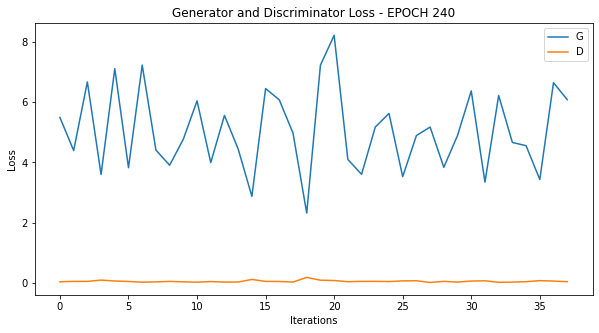

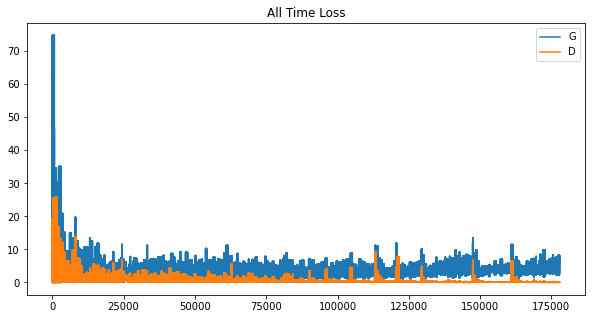

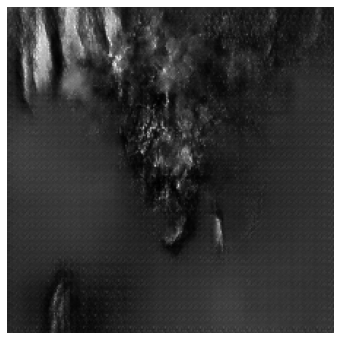

 86%|██████████████████████████████████████████████████████████████████▊           | 240/280 [2:11:27<11:03, 16.60s/it]

Epoch: 240 computed for 16.965811491012573 sec
Gen_loss mean:  5.0480785  std:  1.3589829
Disc_loss mean:  0.05800566  std:  0.030350612


 86%|███████████████████████████████████████████████████████████████████▏          | 241/280 [2:11:43<10:44, 16.52s/it]

Epoch: 241 computed for 16.33811378479004 sec
Gen_loss mean:  4.849316  std:  1.1211003
Disc_loss mean:  0.06191812  std:  0.04293176


 86%|███████████████████████████████████████████████████████████████████▍          | 242/280 [2:12:00<10:26, 16.48s/it]

Epoch: 242 computed for 16.37590765953064 sec
Gen_loss mean:  5.38909  std:  2.6174974
Disc_loss mean:  0.46030366  std:  1.1631848


 87%|███████████████████████████████████████████████████████████████████▋          | 243/280 [2:12:16<10:10, 16.50s/it]

Epoch: 243 computed for 16.552810430526733 sec
Gen_loss mean:  3.7017536  std:  1.277473
Disc_loss mean:  0.42464834  std:  0.42184103


 87%|███████████████████████████████████████████████████████████████████▉          | 244/280 [2:12:33<09:52, 16.46s/it]

Epoch: 244 computed for 16.359612941741943 sec
Gen_loss mean:  4.239412  std:  1.7613093
Disc_loss mean:  0.2926615  std:  0.46108478


 88%|████████████████████████████████████████████████████████████████████▎         | 245/280 [2:12:49<09:35, 16.44s/it]

Epoch: 245 computed for 16.38422155380249 sec
Gen_loss mean:  3.5897133  std:  0.7082503
Disc_loss mean:  0.16331321  std:  0.06360154


 88%|████████████████████████████████████████████████████████████████████▌         | 246/280 [2:13:05<09:19, 16.45s/it]

Epoch: 246 computed for 16.473921298980713 sec
Gen_loss mean:  3.805968  std:  0.8335484
Disc_loss mean:  0.13366334  std:  0.06484325


 88%|████████████████████████████████████████████████████████████████████▊         | 247/280 [2:13:22<09:02, 16.44s/it]

Epoch: 247 computed for 16.408198833465576 sec
Gen_loss mean:  3.999058  std:  0.7936123
Disc_loss mean:  0.1091548  std:  0.040559452


 89%|█████████████████████████████████████████████████████████████████████         | 248/280 [2:13:38<08:45, 16.43s/it]

Epoch: 248 computed for 16.417630434036255 sec
Gen_loss mean:  4.143676  std:  0.76265466
Disc_loss mean:  0.09663566  std:  0.048209425


 89%|█████████████████████████████████████████████████████████████████████▎        | 249/280 [2:13:55<08:29, 16.44s/it]

Epoch: 249 computed for 16.454932928085327 sec
Gen_loss mean:  4.1658654  std:  0.81776375
Disc_loss mean:  0.08859766  std:  0.034779847


 89%|█████████████████████████████████████████████████████████████████████▋        | 250/280 [2:14:11<08:13, 16.46s/it]

Epoch: 250 computed for 16.515885591506958 sec
Gen_loss mean:  4.295785  std:  0.7629055
Disc_loss mean:  0.08770947  std:  0.041724697


 90%|█████████████████████████████████████████████████████████████████████▉        | 251/280 [2:14:28<07:57, 16.46s/it]

Epoch: 251 computed for 16.436386585235596 sec
Gen_loss mean:  4.051061  std:  1.4169805
Disc_loss mean:  0.28861782  std:  0.28452602


 90%|██████████████████████████████████████████████████████████████████████▏       | 252/280 [2:14:44<07:40, 16.46s/it]

Epoch: 252 computed for 16.458046913146973 sec
Gen_loss mean:  4.007685  std:  1.5329081
Disc_loss mean:  0.25495234  std:  0.23787585


 90%|██████████████████████████████████████████████████████████████████████▍       | 253/280 [2:15:01<07:24, 16.46s/it]

Epoch: 253 computed for 16.452516078948975 sec
Gen_loss mean:  4.2043824  std:  0.97708255
Disc_loss mean:  0.124532275  std:  0.086487256


 91%|██████████████████████████████████████████████████████████████████████▊       | 254/280 [2:15:17<07:07, 16.46s/it]

Epoch: 254 computed for 16.450183153152466 sec
Gen_loss mean:  4.157295  std:  0.7506047
Disc_loss mean:  0.098574325  std:  0.046621338


 91%|███████████████████████████████████████████████████████████████████████       | 255/280 [2:15:33<06:50, 16.44s/it]

Epoch: 255 computed for 16.393083572387695 sec
Gen_loss mean:  4.283026  std:  0.83927417
Disc_loss mean:  0.094028614  std:  0.05657522


 91%|███████████████████████████████████████████████████████████████████████▎      | 256/280 [2:15:50<06:33, 16.41s/it]

Epoch: 256 computed for 16.3531231880188 sec
Gen_loss mean:  4.1679897  std:  0.57260156
Disc_loss mean:  0.07077029  std:  0.023090702


 92%|███████████████████████████████████████████████████████████████████████▌      | 257/280 [2:16:06<06:17, 16.43s/it]

Epoch: 257 computed for 16.468550443649292 sec
Gen_loss mean:  4.449463  std:  0.9217109
Disc_loss mean:  0.07283775  std:  0.04078808


 92%|███████████████████████████████████████████████████████████████████████▊      | 258/280 [2:16:23<06:01, 16.42s/it]

Epoch: 258 computed for 16.40776515007019 sec
Gen_loss mean:  4.512442  std:  0.92398036
Disc_loss mean:  0.06471619  std:  0.020608528


 92%|████████████████████████████████████████████████████████████████████████▏     | 259/280 [2:16:39<05:44, 16.42s/it]

Epoch: 259 computed for 16.403217315673828 sec
Gen_loss mean:  4.6482368  std:  0.69439995
Disc_loss mean:  0.054378062  std:  0.020780815


 93%|████████████████████████████████████████████████████████████████████████▍     | 260/280 [2:16:55<05:28, 16.42s/it]

Epoch: 260 computed for 16.43420720100403 sec
Gen_loss mean:  4.7371235  std:  1.3098613
Disc_loss mean:  0.07014678  std:  0.055703115


 93%|████████████████████████████████████████████████████████████████████████▋     | 261/280 [2:17:12<05:12, 16.47s/it]

Epoch: 261 computed for 16.559518337249756 sec
Gen_loss mean:  4.8907547  std:  1.1878617
Disc_loss mean:  0.068451114  std:  0.05233362


 94%|████████████████████████████████████████████████████████████████████████▉     | 262/280 [2:17:28<04:56, 16.45s/it]

Epoch: 262 computed for 16.418691873550415 sec
Gen_loss mean:  5.121624  std:  1.0524904
Disc_loss mean:  0.050487828  std:  0.026952986


 94%|█████████████████████████████████████████████████████████████████████████▎    | 263/280 [2:17:45<04:39, 16.45s/it]

Epoch: 263 computed for 16.434107303619385 sec
Gen_loss mean:  5.227833  std:  1.3440994
Disc_loss mean:  0.06309034  std:  0.05197991


 94%|█████████████████████████████████████████████████████████████████████████▌    | 264/280 [2:18:01<04:22, 16.44s/it]

Epoch: 264 computed for 16.407869338989258 sec
Gen_loss mean:  5.2069454  std:  2.2006402
Disc_loss mean:  0.43126738  std:  1.1810533


 95%|█████████████████████████████████████████████████████████████████████████▊    | 265/280 [2:18:18<04:07, 16.47s/it]

Epoch: 265 computed for 16.55954909324646 sec
Gen_loss mean:  4.078818  std:  1.2829062
Disc_loss mean:  0.6005516  std:  1.0255201


 95%|██████████████████████████████████████████████████████████████████████████    | 266/280 [2:18:34<03:50, 16.45s/it]

Epoch: 266 computed for 16.406133890151978 sec
Gen_loss mean:  3.529533  std:  1.3355138
Disc_loss mean:  0.29479137  std:  0.24349396


 95%|██████████████████████████████████████████████████████████████████████████▍   | 267/280 [2:18:51<03:33, 16.44s/it]

Epoch: 267 computed for 16.407692670822144 sec
Gen_loss mean:  3.805011  std:  1.5304141
Disc_loss mean:  0.21090603  std:  0.15459731


 96%|██████████████████████████████████████████████████████████████████████████▋   | 268/280 [2:19:07<03:17, 16.47s/it]

Epoch: 268 computed for 16.522466897964478 sec
Gen_loss mean:  3.8042562  std:  0.8429306
Disc_loss mean:  0.14095868  std:  0.059663568


 96%|██████████████████████████████████████████████████████████████████████████▉   | 269/280 [2:19:24<03:00, 16.45s/it]

Epoch: 269 computed for 16.399007081985474 sec
Gen_loss mean:  4.0676284  std:  1.0699373
Disc_loss mean:  0.1406389  std:  0.08630875


 96%|███████████████████████████████████████████████████████████████████████████▏  | 270/280 [2:19:40<02:44, 16.44s/it]

Epoch: 270 computed for 16.419721841812134 sec
Gen_loss mean:  3.9705312  std:  0.7111617
Disc_loss mean:  0.10345547  std:  0.046051864


 97%|███████████████████████████████████████████████████████████████████████████▍  | 271/280 [2:19:56<02:27, 16.44s/it]

Epoch: 271 computed for 16.439939260482788 sec
Gen_loss mean:  4.2745852  std:  1.3314782
Disc_loss mean:  0.15391243  std:  0.15772714


 97%|███████████████████████████████████████████████████████████████████████████▊  | 272/280 [2:20:13<02:11, 16.47s/it]

Epoch: 272 computed for 16.551121950149536 sec
Gen_loss mean:  4.3001113  std:  0.9086484
Disc_loss mean:  0.10888686  std:  0.05344576


 98%|████████████████████████████████████████████████████████████████████████████  | 273/280 [2:20:29<01:55, 16.45s/it]

Epoch: 273 computed for 16.3937349319458 sec
Gen_loss mean:  4.224441  std:  0.7454967
Disc_loss mean:  0.08664595  std:  0.03691617


 98%|████████████████████████████████████████████████████████████████████████████▎ | 274/280 [2:20:46<01:38, 16.43s/it]

Epoch: 274 computed for 16.39535117149353 sec
Gen_loss mean:  4.2472258  std:  0.59028363
Disc_loss mean:  0.07272572  std:  0.023365067


 98%|████████████████████████████████████████████████████████████████████████████▌ | 275/280 [2:21:02<01:22, 16.43s/it]

Epoch: 275 computed for 16.404709815979004 sec
Gen_loss mean:  4.2346344  std:  0.57466114
Disc_loss mean:  0.073814236  std:  0.027464546


 99%|████████████████████████████████████████████████████████████████████████████▉ | 276/280 [2:21:19<01:05, 16.48s/it]

Epoch: 276 computed for 16.592588901519775 sec
Gen_loss mean:  4.365292  std:  0.52746665
Disc_loss mean:  0.06417852  std:  0.017043406


 99%|█████████████████████████████████████████████████████████████████████████████▏| 277/280 [2:21:35<00:49, 16.48s/it]

Epoch: 277 computed for 16.474420309066772 sec
Gen_loss mean:  4.516023  std:  0.82173276
Disc_loss mean:  0.072013356  std:  0.030436289


 99%|█████████████████████████████████████████████████████████████████████████████▍| 278/280 [2:21:52<00:32, 16.47s/it]

Epoch: 278 computed for 16.46158480644226 sec
Gen_loss mean:  4.5503507  std:  0.9085787
Disc_loss mean:  0.07640802  std:  0.045228746


100%|█████████████████████████████████████████████████████████████████████████████▋| 279/280 [2:22:08<00:16, 16.51s/it]

Epoch: 279 computed for 16.584969758987427 sec
Gen_loss mean:  4.568038  std:  0.80727446
Disc_loss mean:  0.06631441  std:  0.03307513


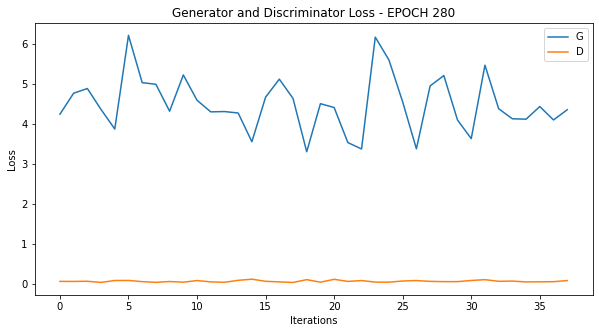

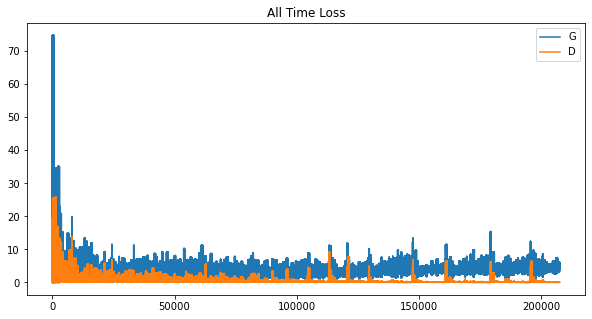

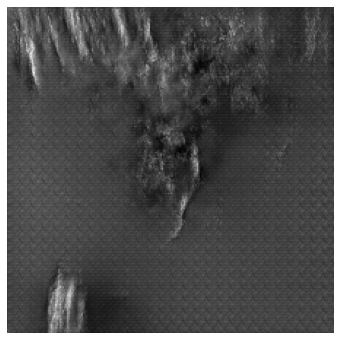

100%|██████████████████████████████████████████████████████████████████████████████| 280/280 [2:22:25<00:00, 30.52s/it]

Epoch: 280 computed for 17.05456519126892 sec
Gen_loss mean:  4.497061  std:  0.6909042
Disc_loss mean:  0.059850287  std:  0.021612337


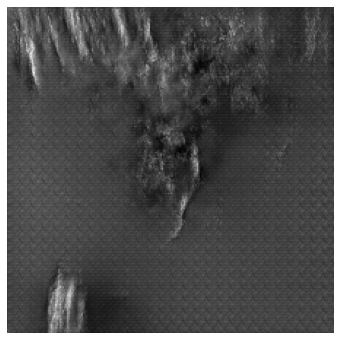

Saved temporary images for evaluation.
Final epoch.


In [311]:
#%%time
train(X1_1, EPOCHS)

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

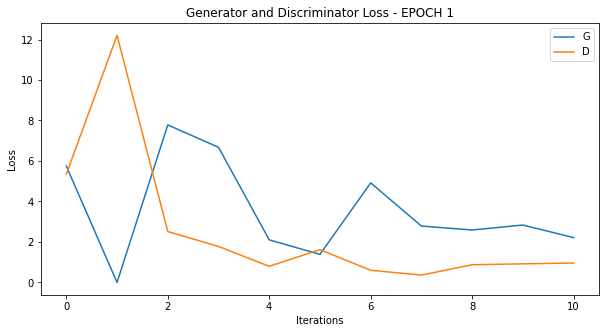

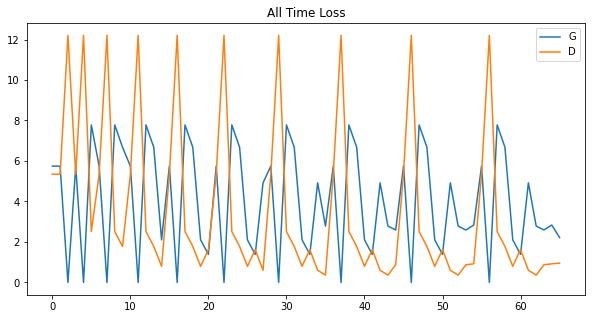

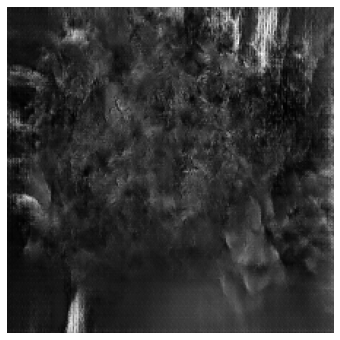

  2%|██                                                                                 | 1/40 [00:10<06:52, 10.58s/it]

Epoch: 1 computed for 10.576173067092896 sec
Gen_loss mean:  3.5492089  std:  2.2873433
Disc_loss mean:  2.5434573  std:  3.3324385


  5%|████▏                                                                              | 2/40 [00:19<06:06,  9.65s/it]

Epoch: 2 computed for 8.991147994995117 sec
Gen_loss mean:  3.7531855  std:  2.4602315
Disc_loss mean:  0.84539795  std:  0.75374544


  8%|██████▏                                                                            | 3/40 [00:28<05:43,  9.29s/it]

Epoch: 3 computed for 8.8606276512146 sec
Gen_loss mean:  3.8149633  std:  1.0405359
Disc_loss mean:  0.42616034  std:  0.19833244


 10%|████████▎                                                                          | 4/40 [00:37<05:33,  9.26s/it]

Epoch: 4 computed for 9.202876091003418 sec
Gen_loss mean:  3.2220514  std:  1.40803
Disc_loss mean:  0.79163194  std:  0.4635113


 12%|██████████▍                                                                        | 5/40 [00:46<05:19,  9.12s/it]

Epoch: 5 computed for 8.872004270553589 sec
Gen_loss mean:  4.058143  std:  3.2154632
Disc_loss mean:  1.0684506  std:  1.7654229


 15%|████████████▍                                                                      | 6/40 [00:54<05:00,  8.84s/it]

Epoch: 6 computed for 8.30738377571106 sec
Gen_loss mean:  3.4134064  std:  2.1218655
Disc_loss mean:  1.0813597  std:  0.860417


 18%|██████████████▌                                                                    | 7/40 [01:03<04:50,  8.80s/it]

Epoch: 7 computed for 8.701553344726562 sec
Gen_loss mean:  2.9751456  std:  1.4356014
Disc_loss mean:  0.6106806  std:  0.18470536


 20%|████████████████▌                                                                  | 8/40 [01:11<04:36,  8.63s/it]

Epoch: 8 computed for 8.275457620620728 sec
Gen_loss mean:  3.0836859  std:  1.2982005
Disc_loss mean:  0.60237384  std:  0.28442222


 22%|██████████████████▋                                                                | 9/40 [01:20<04:25,  8.56s/it]

Epoch: 9 computed for 8.402065992355347 sec
Gen_loss mean:  3.5781174  std:  2.482157
Disc_loss mean:  0.84523445  std:  0.6374713


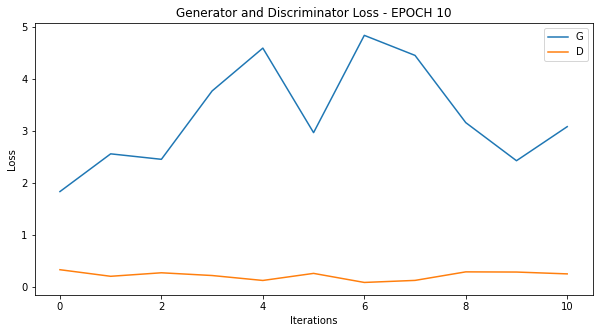

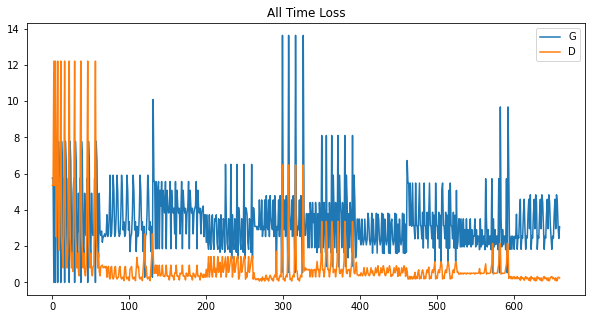

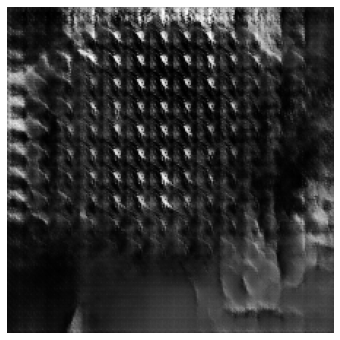

 25%|████████████████████▌                                                             | 10/40 [01:29<04:22,  8.73s/it]

Epoch: 10 computed for 9.124580383300781 sec
Gen_loss mean:  3.2789948  std:  0.9497625
Disc_loss mean:  0.21882302  std:  0.075618766


 28%|██████████████████████▌                                                           | 11/40 [01:37<04:11,  8.66s/it]

Epoch: 11 computed for 8.481550931930542 sec
Gen_loss mean:  2.7803295  std:  1.0999722
Disc_loss mean:  0.58473366  std:  0.1759129


 30%|████████████████████████▌                                                         | 12/40 [01:46<04:00,  8.60s/it]

Epoch: 12 computed for 8.48108696937561 sec
Gen_loss mean:  3.2411003  std:  1.3940445
Disc_loss mean:  0.45860246  std:  0.26180995


 32%|██████████████████████████▋                                                       | 13/40 [01:54<03:50,  8.55s/it]

Epoch: 13 computed for 8.417593717575073 sec
Gen_loss mean:  3.6679826  std:  2.8057756
Disc_loss mean:  1.0624357  std:  1.2207956


 35%|████████████████████████████▋                                                     | 14/40 [02:03<03:42,  8.54s/it]

Epoch: 14 computed for 8.522474765777588 sec
Gen_loss mean:  4.8187447  std:  2.3542864
Disc_loss mean:  0.35270783  std:  0.26374483


 38%|██████████████████████████████▊                                                   | 15/40 [02:11<03:32,  8.51s/it]

Epoch: 15 computed for 8.428506851196289 sec
Gen_loss mean:  2.7236667  std:  0.87120575
Disc_loss mean:  0.56688625  std:  0.28756866


 40%|████████████████████████████████▊                                                 | 16/40 [02:20<03:23,  8.49s/it]

Epoch: 16 computed for 8.443271398544312 sec
Gen_loss mean:  2.9501264  std:  1.9243926
Disc_loss mean:  0.9090754  std:  0.6362195


 42%|██████████████████████████████████▊                                               | 17/40 [02:28<03:15,  8.51s/it]

Epoch: 17 computed for 8.551411867141724 sec
Gen_loss mean:  2.9461198  std:  1.1605506
Disc_loss mean:  0.47437802  std:  0.12603278


 45%|████████████████████████████████████▉                                             | 18/40 [02:37<03:08,  8.55s/it]

Epoch: 18 computed for 8.643041372299194 sec
Gen_loss mean:  3.2980301  std:  1.7859777
Disc_loss mean:  0.6279743  std:  0.31563157


 48%|██████████████████████████████████████▉                                           | 19/40 [02:46<03:01,  8.62s/it]

Epoch: 19 computed for 8.792337894439697 sec
Gen_loss mean:  3.1269426  std:  1.6672205
Disc_loss mean:  0.57754076  std:  0.22753157


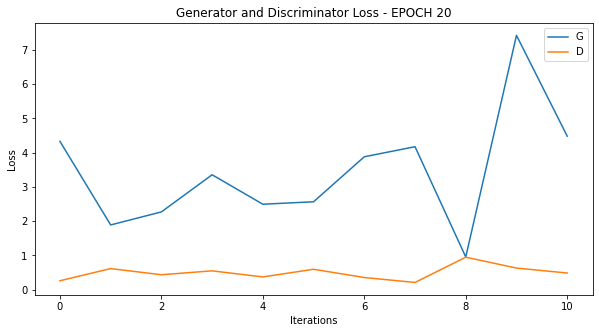

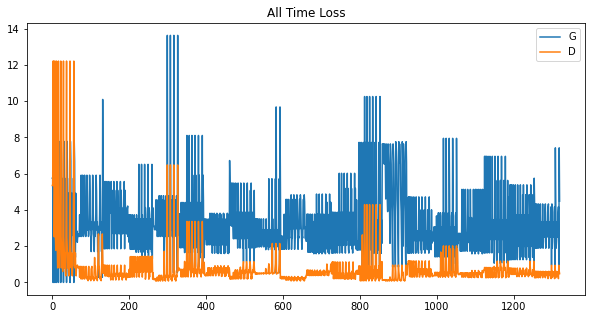

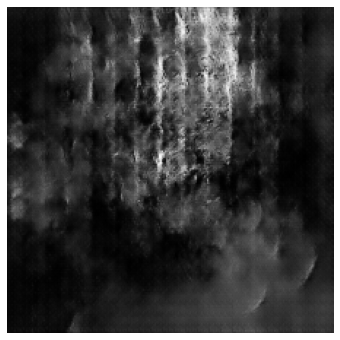

 50%|█████████████████████████████████████████                                         | 20/40 [02:55<02:58,  8.93s/it]

Epoch: 20 computed for 9.632655382156372 sec
Gen_loss mean:  3.4363687  std:  1.6532764
Disc_loss mean:  0.49638033  std:  0.1965396


 52%|███████████████████████████████████████████                                       | 21/40 [03:04<02:49,  8.93s/it]

Epoch: 21 computed for 8.931382656097412 sec
Gen_loss mean:  2.4782503  std:  0.75290537
Disc_loss mean:  0.46869898  std:  0.16381744


 55%|█████████████████████████████████████████████                                     | 22/40 [03:12<02:37,  8.73s/it]

Epoch: 22 computed for 8.263075590133667 sec
Gen_loss mean:  3.2422738  std:  1.2216371
Disc_loss mean:  0.46094304  std:  0.31989238


 57%|███████████████████████████████████████████████▏                                  | 23/40 [03:21<02:28,  8.74s/it]

Epoch: 23 computed for 8.771086931228638 sec
Gen_loss mean:  3.0472815  std:  1.364095
Disc_loss mean:  0.5094483  std:  0.4032012


 60%|█████████████████████████████████████████████████▏                                | 24/40 [03:30<02:19,  8.69s/it]

Epoch: 24 computed for 8.582515478134155 sec
Gen_loss mean:  2.6873121  std:  0.75211966
Disc_loss mean:  0.37243956  std:  0.106617205


 62%|███████████████████████████████████████████████████▎                              | 25/40 [03:38<02:10,  8.68s/it]

Epoch: 25 computed for 8.636807203292847 sec
Gen_loss mean:  3.0337074  std:  1.0364846
Disc_loss mean:  0.29832572  std:  0.08810469


 65%|█████████████████████████████████████████████████████▎                            | 26/40 [03:48<02:03,  8.84s/it]

Epoch: 26 computed for 9.229933977127075 sec
Gen_loss mean:  3.1049042  std:  1.0051322
Disc_loss mean:  0.36083648  std:  0.13084748


 68%|███████████████████████████████████████████████████████▎                          | 27/40 [03:56<01:54,  8.84s/it]

Epoch: 27 computed for 8.83157229423523 sec
Gen_loss mean:  2.9617882  std:  0.6990885
Disc_loss mean:  0.28963163  std:  0.03962195


 70%|█████████████████████████████████████████████████████████▍                        | 28/40 [04:06<01:46,  8.91s/it]

Epoch: 28 computed for 9.071755409240723 sec
Gen_loss mean:  2.7401426  std:  0.35192603
Disc_loss mean:  0.2874523  std:  0.07882947


 72%|███████████████████████████████████████████████████████████▍                      | 29/40 [04:14<01:37,  8.89s/it]

Epoch: 29 computed for 8.836508512496948 sec
Gen_loss mean:  2.7758842  std:  0.49128667
Disc_loss mean:  0.3231326  std:  0.075304806


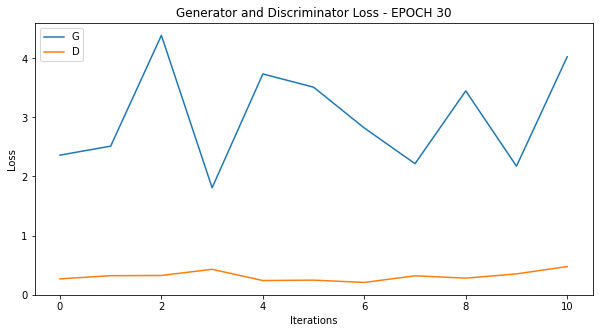

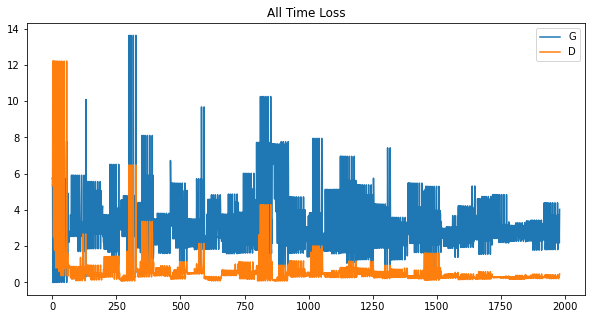

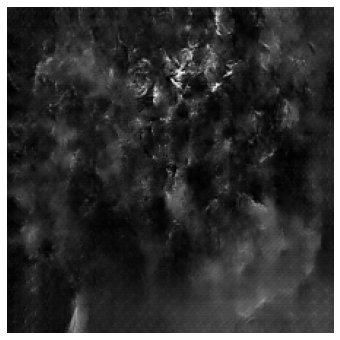

 75%|█████████████████████████████████████████████████████████████▌                    | 30/40 [04:24<01:29,  8.97s/it]

Epoch: 30 computed for 9.163888216018677 sec
Gen_loss mean:  3.0009704  std:  0.8193376
Disc_loss mean:  0.3132784  std:  0.077543765


 78%|███████████████████████████████████████████████████████████████▌                  | 31/40 [04:32<01:20,  8.89s/it]

Epoch: 31 computed for 8.711349248886108 sec
Gen_loss mean:  2.9492164  std:  0.7004142
Disc_loss mean:  0.28659326  std:  0.07624068


 80%|█████████████████████████████████████████████████████████████████▌                | 32/40 [04:41<01:11,  8.88s/it]

Epoch: 32 computed for 8.849632740020752 sec
Gen_loss mean:  3.0176673  std:  0.71481055
Disc_loss mean:  0.2561069  std:  0.082635775


 82%|███████████████████████████████████████████████████████████████████▋              | 33/40 [04:50<01:02,  8.92s/it]

Epoch: 33 computed for 8.996874809265137 sec
Gen_loss mean:  3.304889  std:  1.1293707
Disc_loss mean:  0.31331378  std:  0.1732103


 85%|█████████████████████████████████████████████████████████████████████▋            | 34/40 [04:59<00:53,  8.95s/it]

Epoch: 34 computed for 9.039494276046753 sec
Gen_loss mean:  3.2638366  std:  1.3950216
Disc_loss mean:  0.33677366  std:  0.15957312


 88%|███████████████████████████████████████████████████████████████████████▊          | 35/40 [05:08<00:44,  8.84s/it]

Epoch: 35 computed for 8.563274145126343 sec
Gen_loss mean:  3.3795426  std:  1.200368
Disc_loss mean:  0.35872963  std:  0.19332772


 90%|█████████████████████████████████████████████████████████████████████████▊        | 36/40 [05:16<00:34,  8.66s/it]

Epoch: 36 computed for 8.242376804351807 sec
Gen_loss mean:  3.0017073  std:  1.0506023
Disc_loss mean:  0.29476687  std:  0.14575908


 92%|███████████████████████████████████████████████████████████████████████████▊      | 37/40 [05:25<00:25,  8.63s/it]

Epoch: 37 computed for 8.574350833892822 sec
Gen_loss mean:  3.1957064  std:  0.66690576
Disc_loss mean:  0.26139176  std:  0.080464154


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 38/40 [05:33<00:17,  8.70s/it]

Epoch: 38 computed for 8.855388879776001 sec
Gen_loss mean:  3.156578  std:  0.85294104
Disc_loss mean:  0.23904945  std:  0.056792945


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 39/40 [05:42<00:08,  8.72s/it]

Epoch: 39 computed for 8.774513483047485 sec
Gen_loss mean:  3.022663  std:  0.47968805
Disc_loss mean:  0.2256021  std:  0.047978885


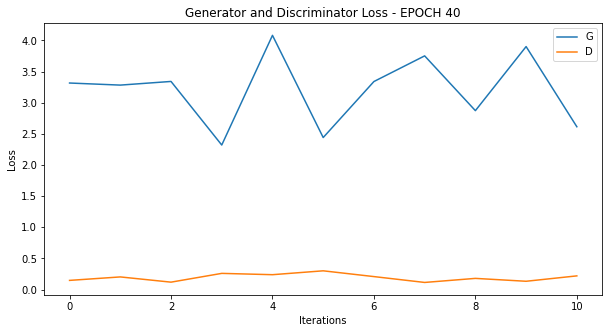

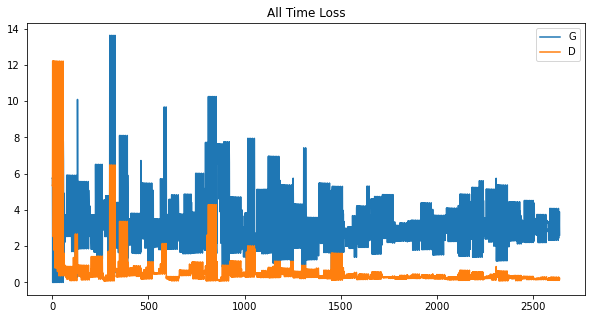

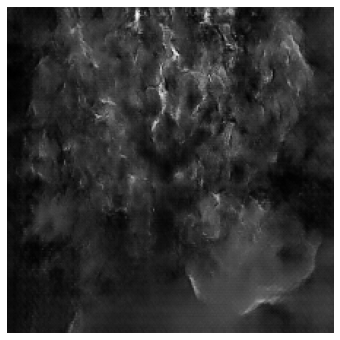

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [05:51<00:00,  8.79s/it]

Epoch: 40 computed for 8.811943531036377 sec
Gen_loss mean:  3.2053823  std:  0.5584753
Disc_loss mean:  0.19353718  std:  0.05780731


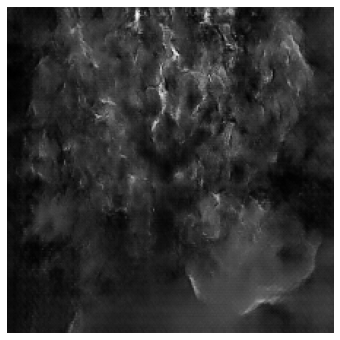

Final epoch.


In [267]:
train(X_1, EPOCHS)

In [315]:
zip_images()

Saved final images for submission.


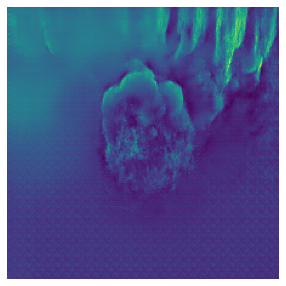

In [312]:
generate_test_image(generator)

In [313]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

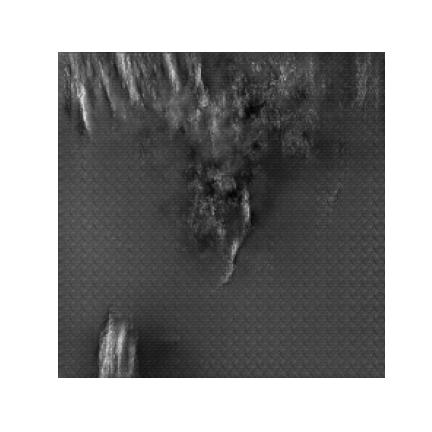

In [314]:
display_image(EPOCHS)

In [316]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [317]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 1*(i**2)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
    IPython.display.Image(filename=anim_file)


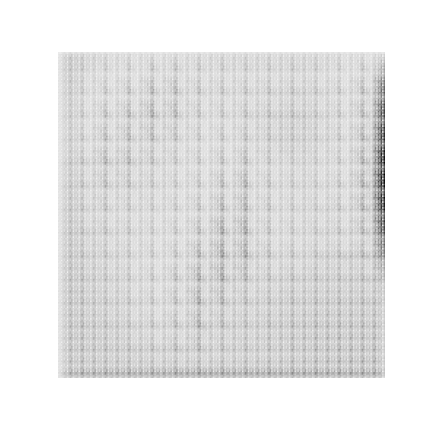

In [318]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)